# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
#import library
import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To perform statistical analysis
import scipy.stats as stats

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,

    make_scorer)

In [2]:
df=pd.read_csv('INNHotelsGroup.csv')
df.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

## Data Overview

- Observations
- Sanity checks

In [3]:
df.shape

(36275, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

Observations:
Dataset has

- 5 Object columns

- 1 Float columns

- 13 Int columns

In [5]:
#Drop Booking ID
df.drop('Booking_ID',axis=1,inplace=True)

In [6]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

Observations:
No misssing values in the dataset.

In [7]:
df.duplicated().sum()

np.int64(10275)

Observations:
No duplicated values in the dataset.

In [8]:
#Checking for negative numbers in df
df.select_dtypes(exclude='object').lt(0).any()

no_of_adults                            False
no_of_children                          False
no_of_weekend_nights                    False
no_of_week_nights                       False
required_car_parking_space              False
lead_time                               False
arrival_year                            False
arrival_month                           False
arrival_date                            False
repeated_guest                          False
no_of_previous_cancellations            False
no_of_previous_bookings_not_canceled    False
avg_price_per_room                      False
no_of_special_requests                  False
dtype: bool

Observations:
The dataset does not have negative values.

In [9]:
df.describe().T

count         mean        std     min  \
no_of_adults                          36275.0     1.844962   0.518715     0.0   
no_of_children                        36275.0     0.105279   0.402648     0.0   
no_of_weekend_nights                  36275.0     0.810724   0.870644     0.0   
no_of_week_nights                     36275.0     2.204300   1.410905     0.0   
required_car_parking_space            36275.0     0.030986   0.173281     0.0   
lead_time                             36275.0    85.232557  85.930817     0.0   
arrival_year                          36275.0  2017.820427   0.383836  2017.0   
arrival_month                         36275.0     7.423653   3.069894     1.0   
arrival_date                          36275.0    15.596995   8.740447     1.0   
repeated_guest                        36275.0     0.025637   0.158053     0.0   
no_of_previous_cancellations          36275.0     0.023349   0.368331     0.0   
no_of_previous_bookings_not_canceled  36275.0     0.153411   1.754171     0.0   
avg_price_per_room                    36275.0   103.423539  35.089424     0.0   
no_of_special_requests                36275.0     0.619655   0.786236     0.0   

                                         25%      50%     75%     max  
no_of_adults                             2.0     2.00     2.0     4.0  
no_of_children                           0.0     0.00     0.0    10.0  
no_of_weekend_nights                     0.0     1.00     2.0     7.0  
no_of_week_nights                        1.0     2.00     3.0    17.0  
required_car_parking_space               0.0     0.00     0.0     1.0  
lead_time                               17.0    57.00   126.0   443.0  
arrival_year                          2018.0  2018.00  2018.0  2018.0  
arrival_month                            5.0     8.00    10.0    12.0  
arrival_date                             8.0    16.00    23.0    31.0  
repeated_guest                           0.0     0.00     0.0     1.0  
no_of_previous_cancellations             0.0     0.00     0.0    13.0  
no_of_previous_bookings_not_canceled     0.0     0.00     0.0    58.0  
avg_price_per_room                      80.3    99.45   120.0   540.0  
no_of_special_requests                   0.0     0.00     1.0     5.0

Observations:

- No of adults: Most bookings are by 2 adults.

- No of childres: Most bookings witout children .

- No of weekend nights: mean 0.81, 50% with 1 night and 75% with 3 nights.

- Lead time : Mean 85 days, max 443 wide spread.

- Avg_price_per_room: Mean € 103.42 max € 540  an min of € 0.00 (We will analizy the 0 values)

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

In [10]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [11]:
#print Object columns
cat_col=df.select_dtypes(include='object').columns
cat_col

Index(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type',
       'booking_status'],
      dtype='object')

In [12]:
#print numerical columns
num_col=df.select_dtypes(exclude='object').columns
num_col

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [13]:
#checking for negative values on num col
df[num_col].lt(0).any()

no_of_adults                            False
no_of_children                          False
no_of_weekend_nights                    False
no_of_week_nights                       False
required_car_parking_space              False
lead_time                               False
arrival_year                            False
arrival_month                           False
arrival_date                            False
repeated_guest                          False
no_of_previous_cancellations            False
no_of_previous_bookings_not_canceled    False
avg_price_per_room                      False
no_of_special_requests                  False
dtype: bool

In [14]:
df['type_of_meal_plan'].value_counts(dropna=False)

type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64

In [15]:
df['room_type_reserved'].value_counts(dropna=False)

room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64

In [16]:

df['market_segment_type'].value_counts(dropna=False)

market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64

In [17]:
df['booking_status'].value_counts(dropna=False,normalize=True)

booking_status
Not_Canceled    0.672364
Canceled        0.327636
Name: proportion, dtype: float64

Observations:

- Highly prevalent categories Meal plan 1, Room type 1 and Online.

- Cancellation rate is 33%


## Univariate Analysis

In [18]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="darkgrey"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color= 'lightseagreen',alpha= 0.7
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, color= 'lightseagreen', alpha= 0.7
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [19]:
def labeled_barplot(data, feature, perc=False, n=None, hue=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column (x-axis)
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    hue: (optional) another feature to group bars (default is None)
    """

    total = len(data)  # total rows — needed for % calc
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)

    ax = sns.countplot(
        data=data,
        x=feature,
        hue=hue,
        order=data[feature].value_counts().index[:n],
        palette="Paired"
    )

    for p in ax.patches:
        if perc == True:
            height = p.get_height()
            label = "{:.1f}%".format(100 * height / total)
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )

    plt.show()


In [20]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [21]:

def stacked_barplot(data, predictor, target, title=None):
    """
    Print counts and plot a stacked percentage bar chart with labeled segments.

    Parameters:
    - data: DataFrame
    - predictor: column to group by (x-axis)
    - target: column to stack by (e.g., booking_status)
    - title: optional plot title
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]

    # Print raw counts
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(by=sorter, ascending=False)
    print(tab1)
    print("-" * 120)

    # Normalized proportions
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(by=sorter, ascending=False)

    # Plotting
    ax = tab.plot(kind="bar", stacked=True, figsize=(count + 4, 5), color=["lightcoral", "lightgray"])

    # Axis labels and title
    plt.ylabel("Proportion", fontsize=12)
    plt.xlabel(predictor.replace("_", " ").title(), fontsize=12)
    if title:
        plt.title(title, fontsize=14, fontweight='bold')
    plt.xticks(rotation=90)
    plt.legend(title=target.replace("_", " ").title(), loc="upper left", bbox_to_anchor=(1, 1))

    # Add percentage labels on each segment
    for bar_group in ax.containers:
        for bar in bar_group:
            height = bar.get_height()
            if height > 0.03:  # Show only if at least 3%
                ax.text(
                    bar.get_x() + bar.get_width() / 2,
                    bar.get_y() + height / 2,
                    f"{height:.0%}",
                    ha="center", va="center", fontsize=9, color="black"
                )

    plt.tight_layout()
    plt.show()


In [22]:
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 0]
    )

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False
    )

    plt.tight_layout()
    plt.show()


In [23]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

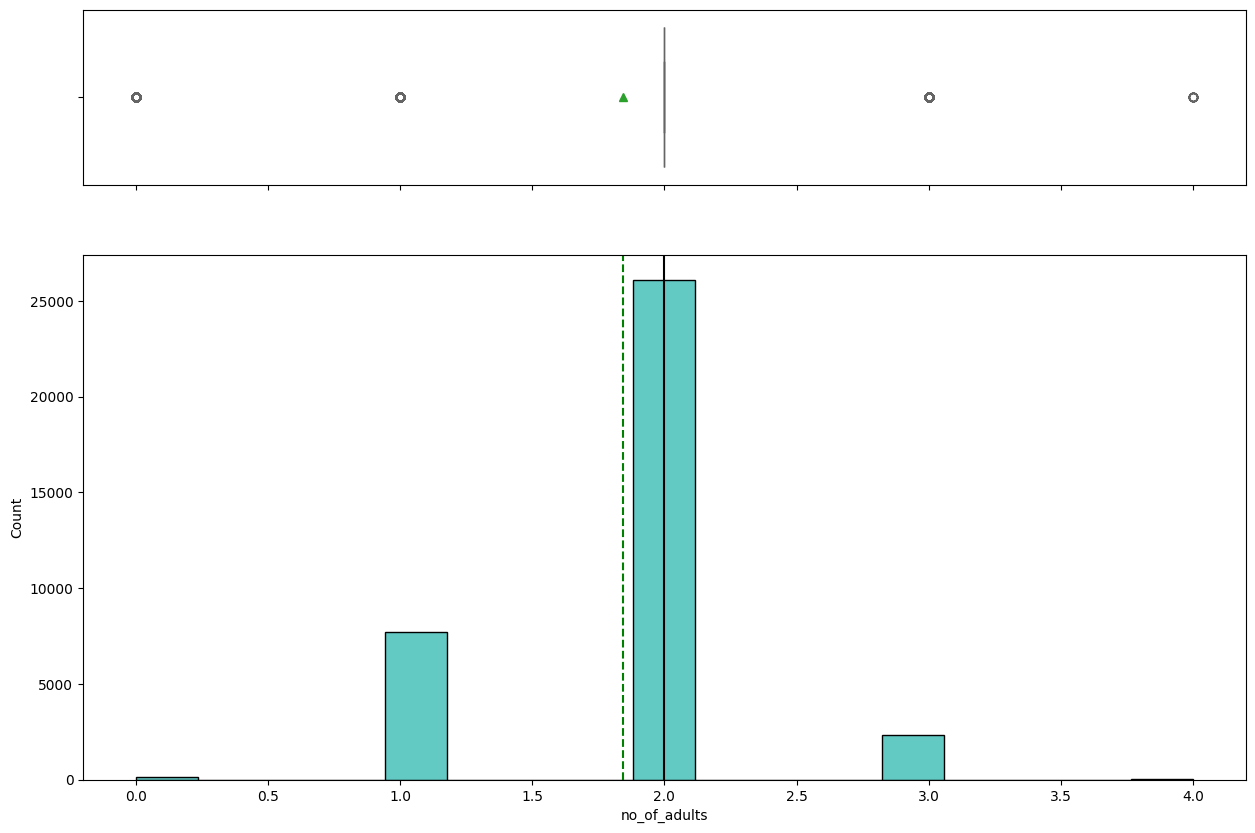

In [24]:
histogram_boxplot(df, 'no_of_adults')

Observations:

- Most bookings have 2 adults.

- Fewer bookings have 1 adult.

- Slight right outliers.

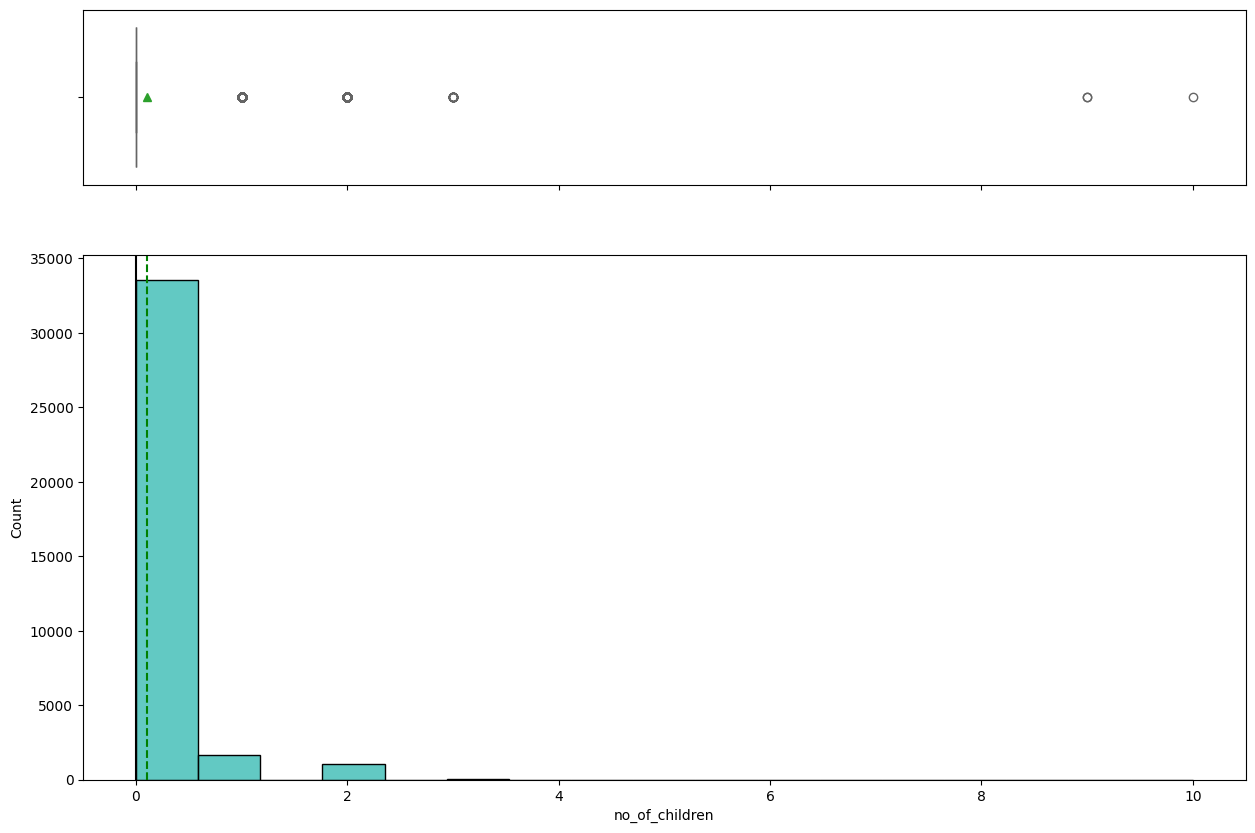

In [25]:
histogram_boxplot(df, 'no_of_children')

Observations:

- Most bookings have 0 children.

- Small groups have 1 or 2 children.

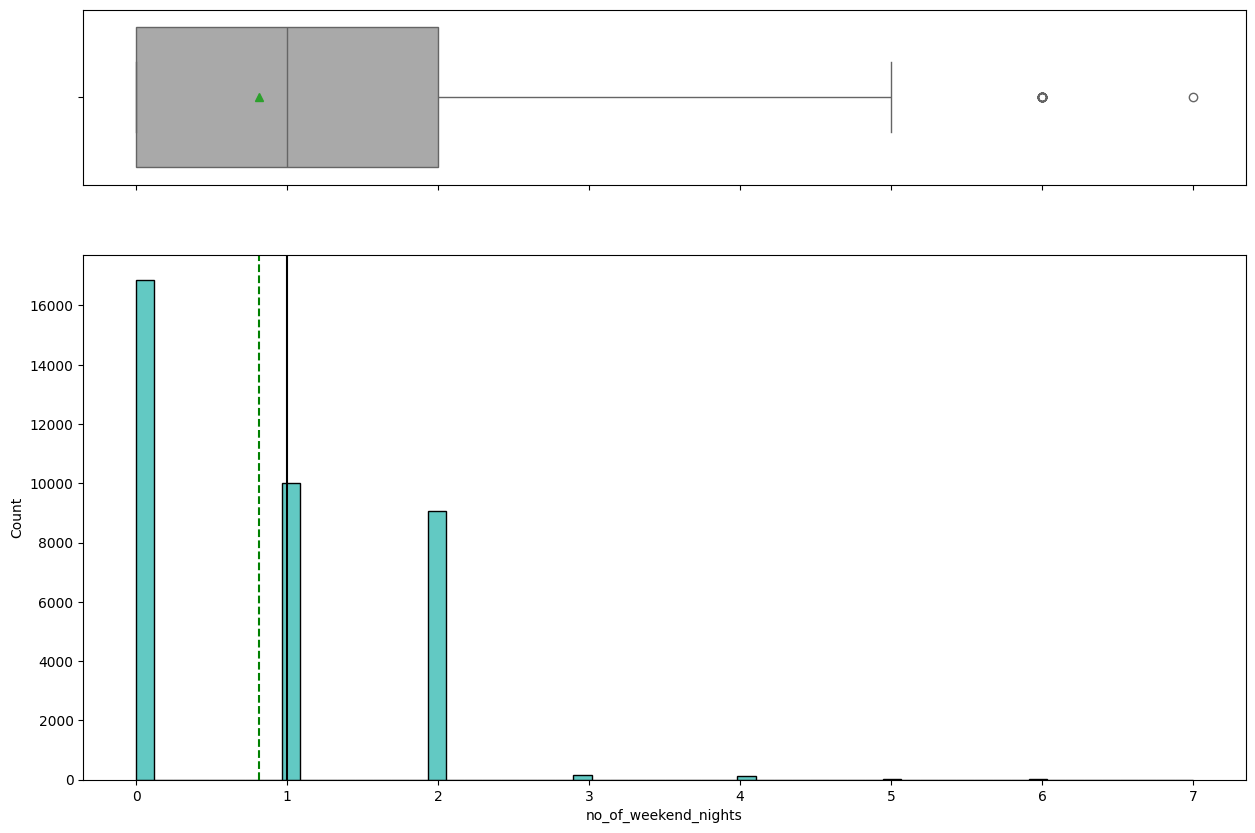

In [26]:
histogram_boxplot(df, 'no_of_weekend_nights')

Observations:

- Majority of bookings have 0,1 or 2 weekend nights with 0 and 1 being the   most  common.



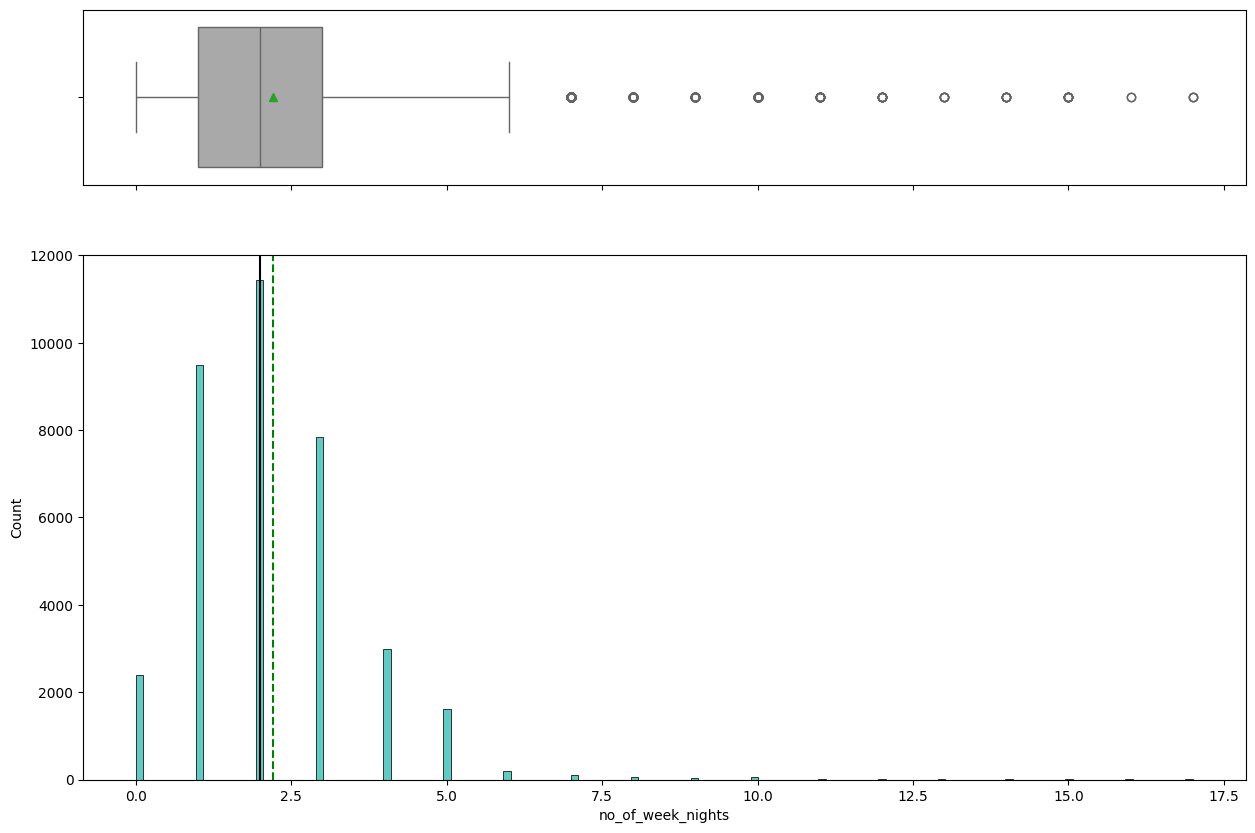

In [27]:
histogram_boxplot(df, 'no_of_week_nights')

Observations:

- 2 nights being the most common.

- The mean is is above the median, right skeweed.




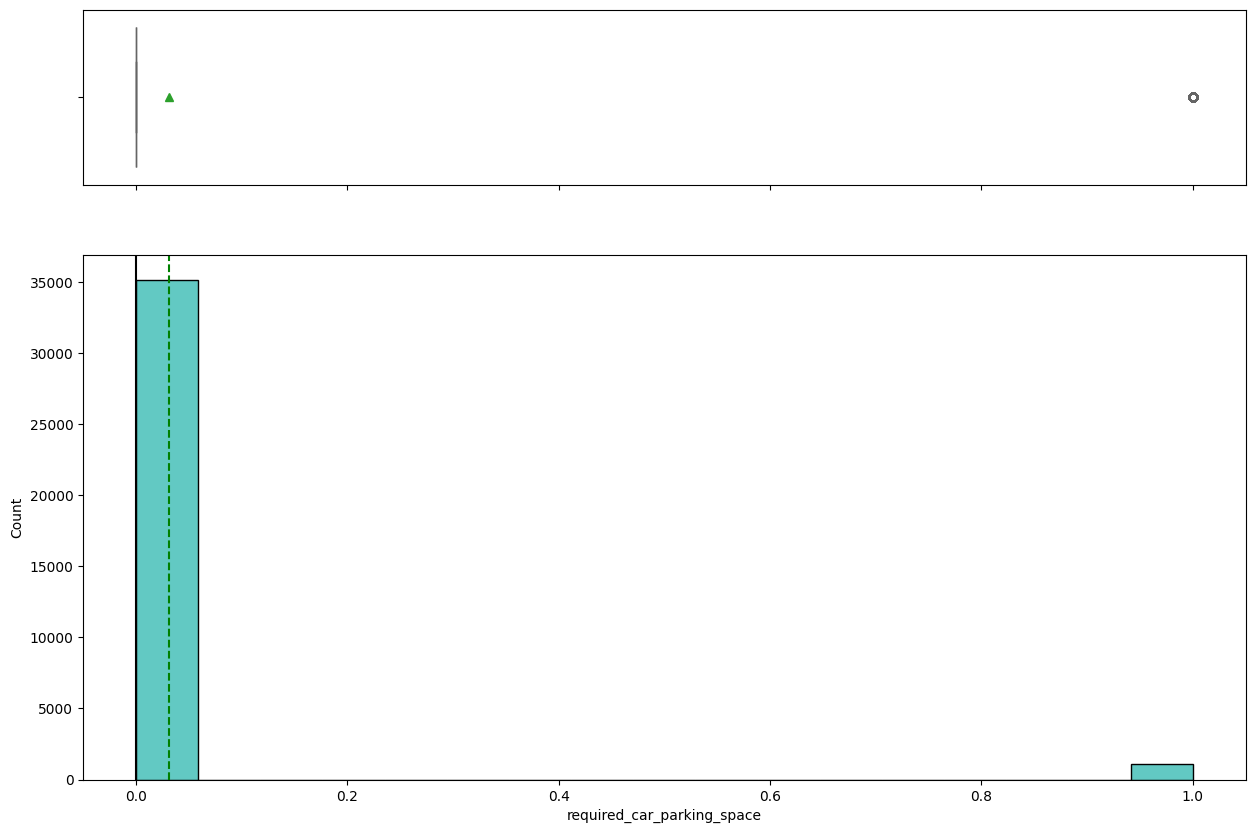

In [28]:
histogram_boxplot(df, 'required_car_parking_space')

Observations:

- Majority of bookings do not require a parking space.

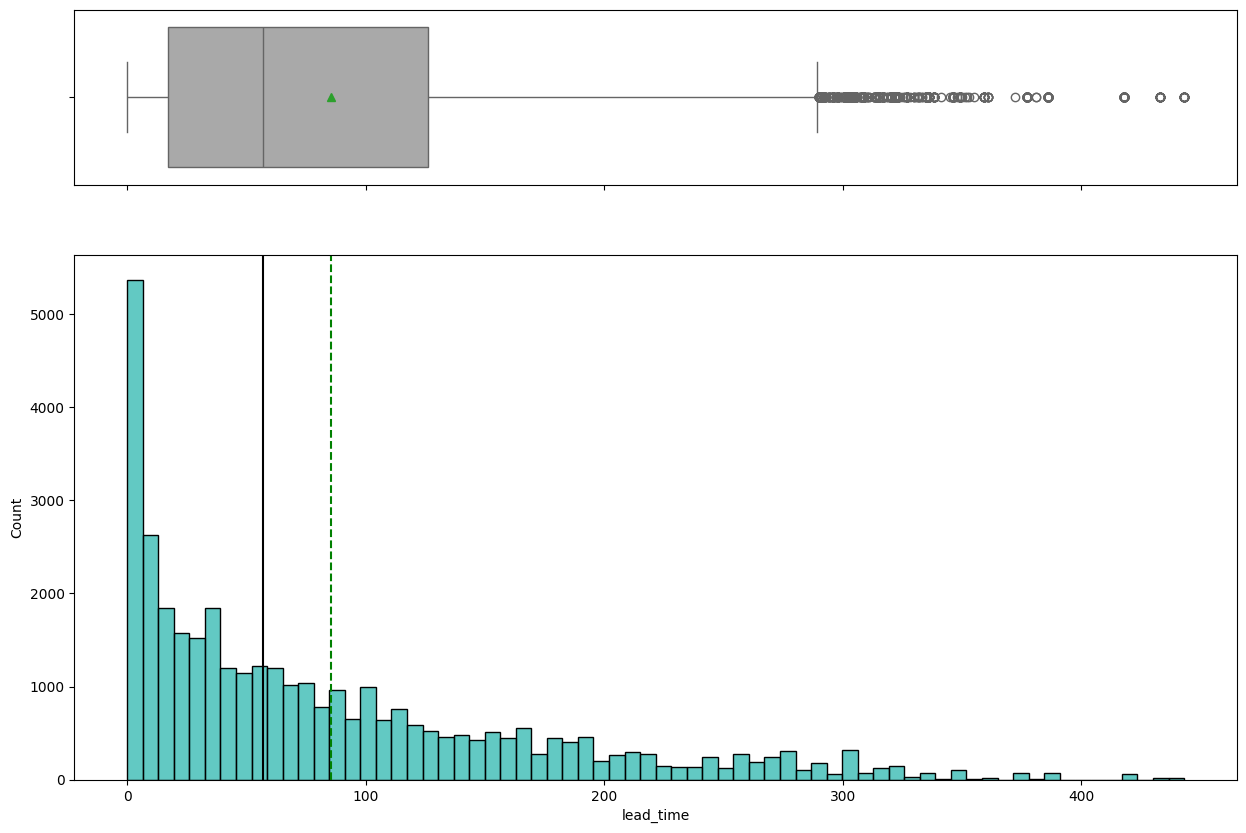

In [29]:
histogram_boxplot(df, 'lead_time')

Observations:

- Distribution is right skeweed.

- Few bookings are made very early (300 days) appears as outlier



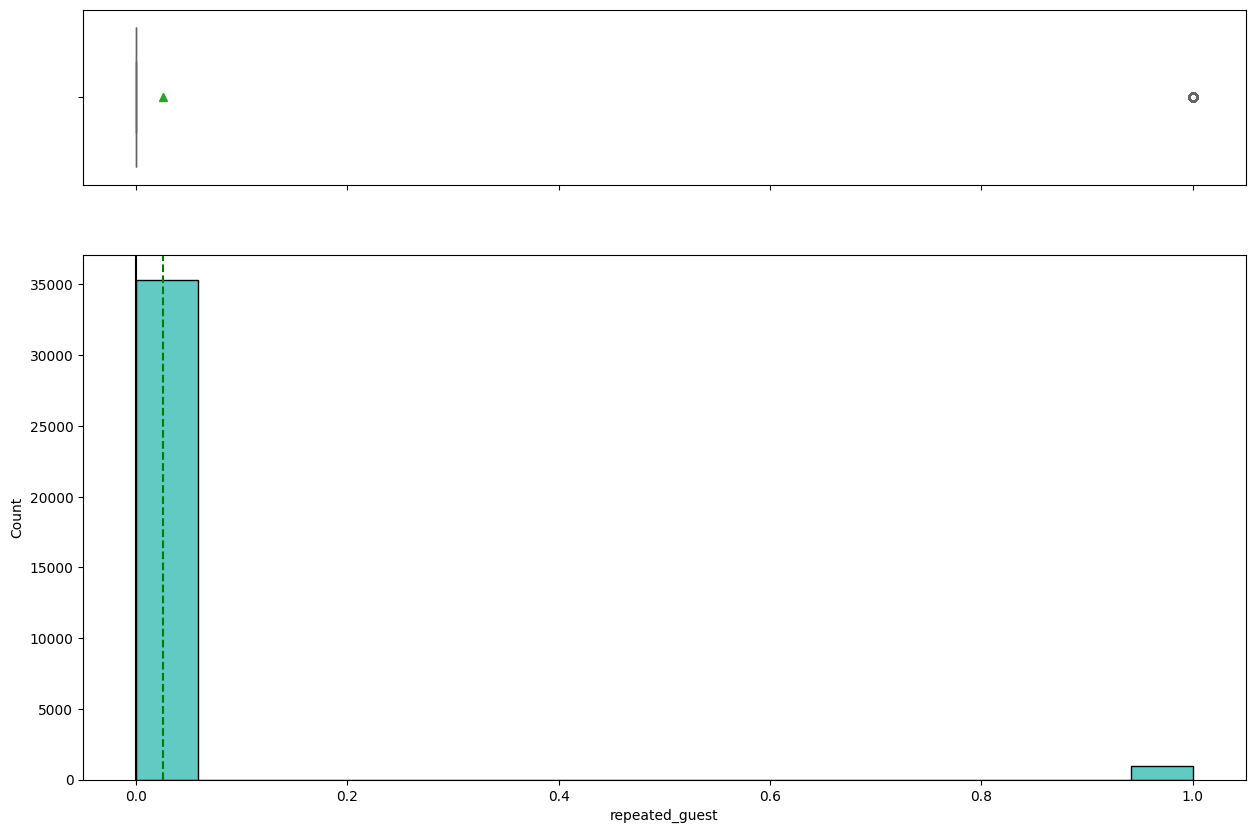

In [30]:
histogram_boxplot(df, 'repeated_guest')

Observations:

- Mostly all repeated guest bookings cluster around 1.



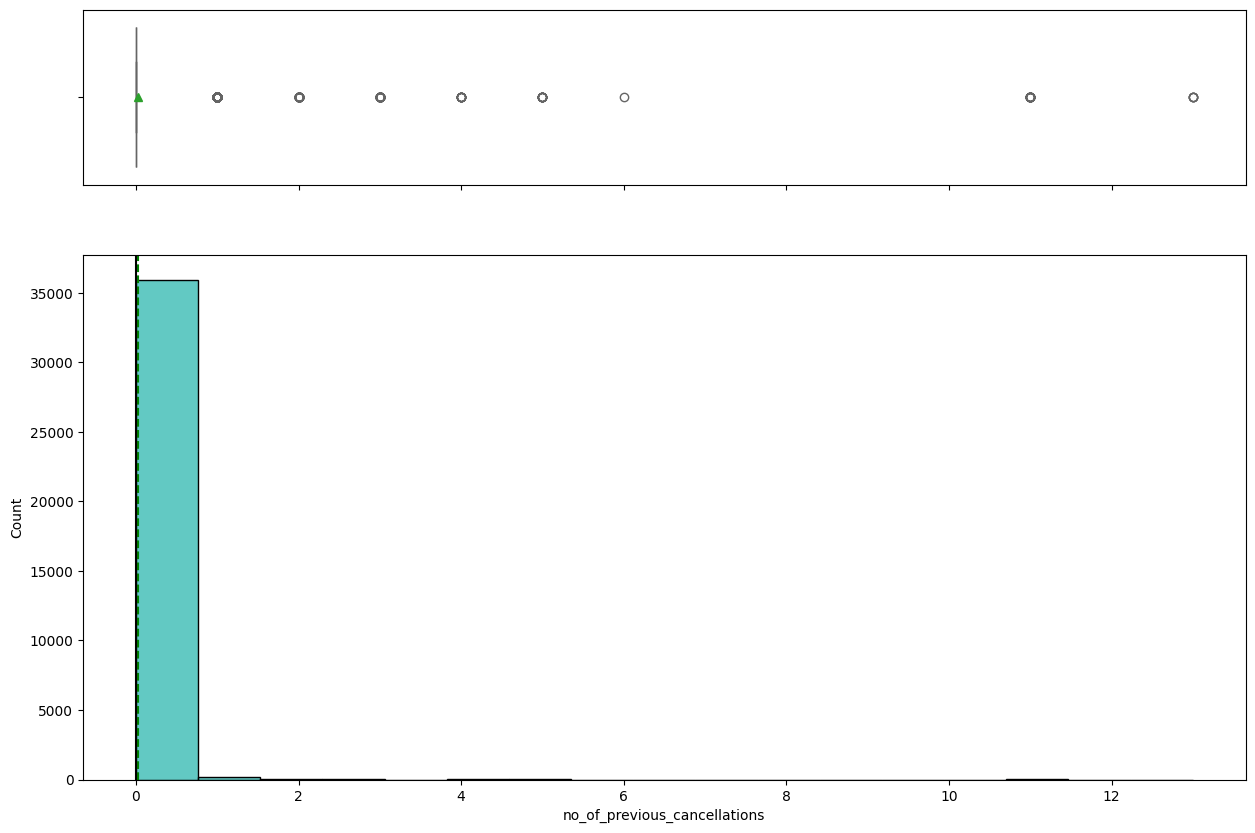

In [31]:
histogram_boxplot(df, 'no_of_previous_cancellations')

Observations:

- Majority bookings have 0 previous cancellations.

- The mean (green triangle) aligns closely with zero, indicating most customers don’t have a cancellation record.

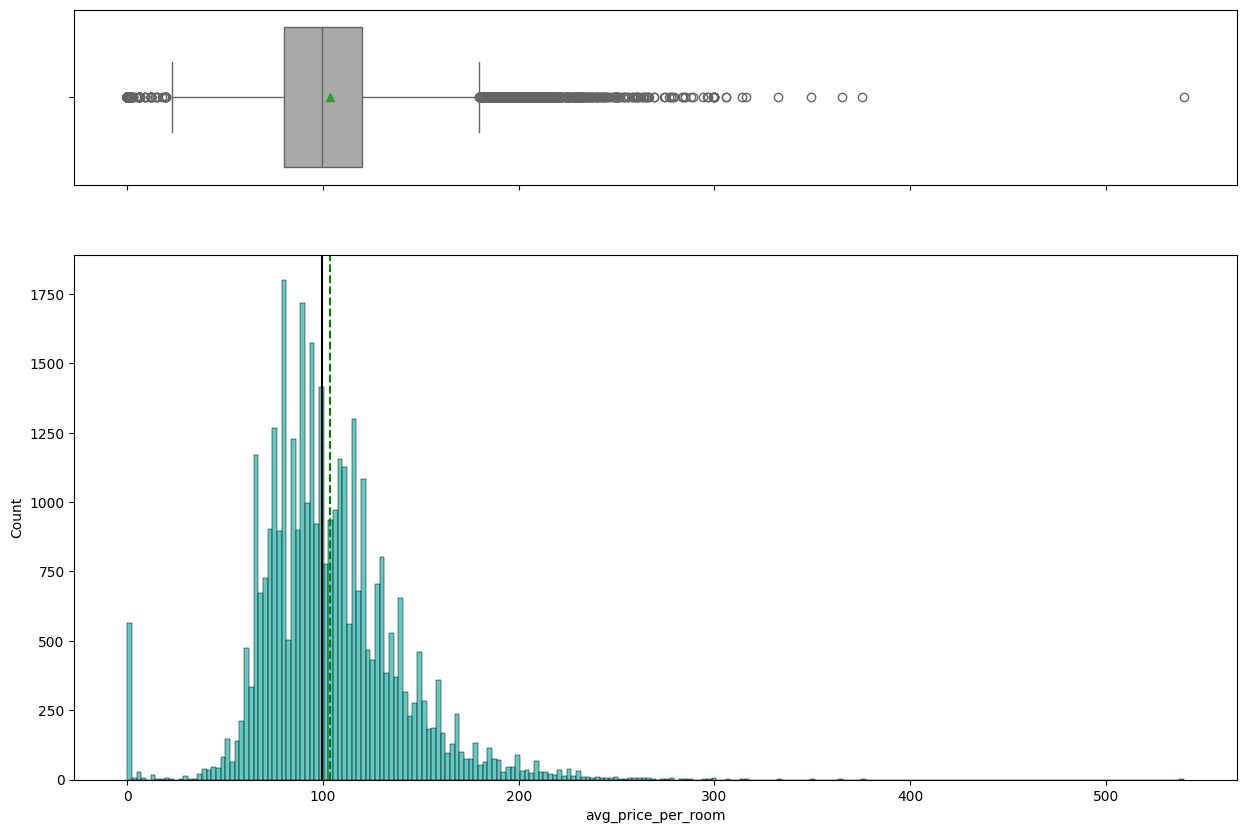

In [32]:
histogram_boxplot(df, 'avg_price_per_room')

In [33]:
n_zero = (df['avg_price_per_room'] == 0).sum()
print(f"Zero-price bookings: {n_zero} ({100*n_zero/len(df):.2f}%)")

Zero-price bookings: 545 (1.50%)


In [34]:
# Identify zero prices
df[df["avg_price_per_room"] == 0]
df.loc[df["avg_price_per_room"] == 0, "market_segment_type"].value_counts()



market_segment_type
Complementary    354
Online           191
Name: count, dtype: int64

In [35]:
#  IQR outlier calculations
Q1 = df["avg_price_per_room"].quantile(0.25)
Q3 = df["avg_price_per_room"].quantile(0.75)
IQR = Q3 - Q1

# Determine upper whisker bound
Upper_Whisker = Q3 + 1.5 * IQR

print(f"Upper whisker: {Upper_Whisker}")
print(IQR)



Upper whisker: 179.55
39.7


In [36]:
Upper_Whisker

np.float64(179.55)

In [37]:
print(f"Q1 = {Q1:.2f}, Q3 = {Q3:.2f}, IQR = {IQR:.2f}, Upper whisker = {Upper_Whisker:.2f}")

Q1 = 80.30, Q3 = 120.00, IQR = 39.70, Upper whisker = 179.55


In [38]:
#df.loc[df["avg_price_per_room"] >= Upper_Whisker, "avg_price_per_room"] = Upper_Whisker

In [39]:
df.loc[df["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

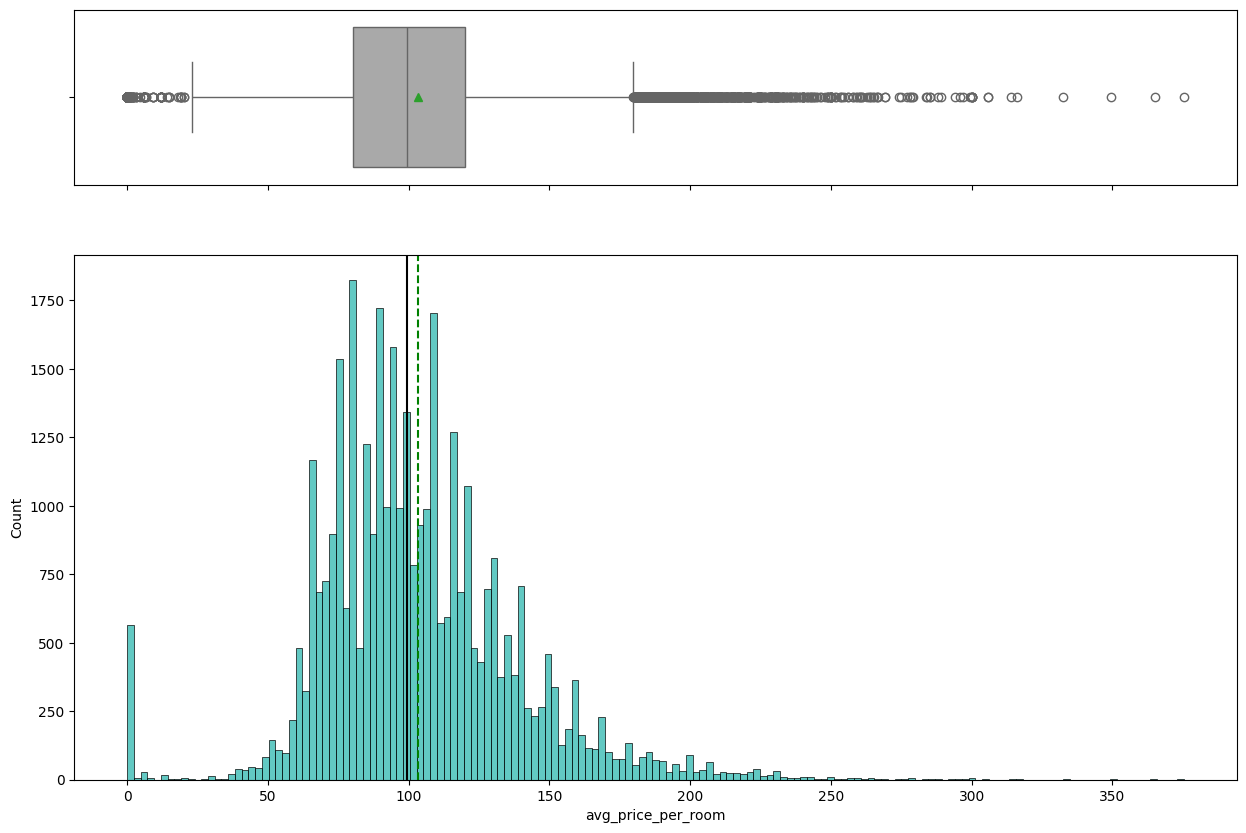

In [40]:
histogram_boxplot(df, 'avg_price_per_room')

Observations:

- Strong right skeweed.

- Zero price, 1.5% ob cookings shows € 0

- Q1 = €80.30, Q3 = €120.00, so IQR = €39.70

- Any price above €179.55 is considered an outlier based on the IQR rule. (For this project 500 was used, to apply winsorization to all values above the computed upper bound)


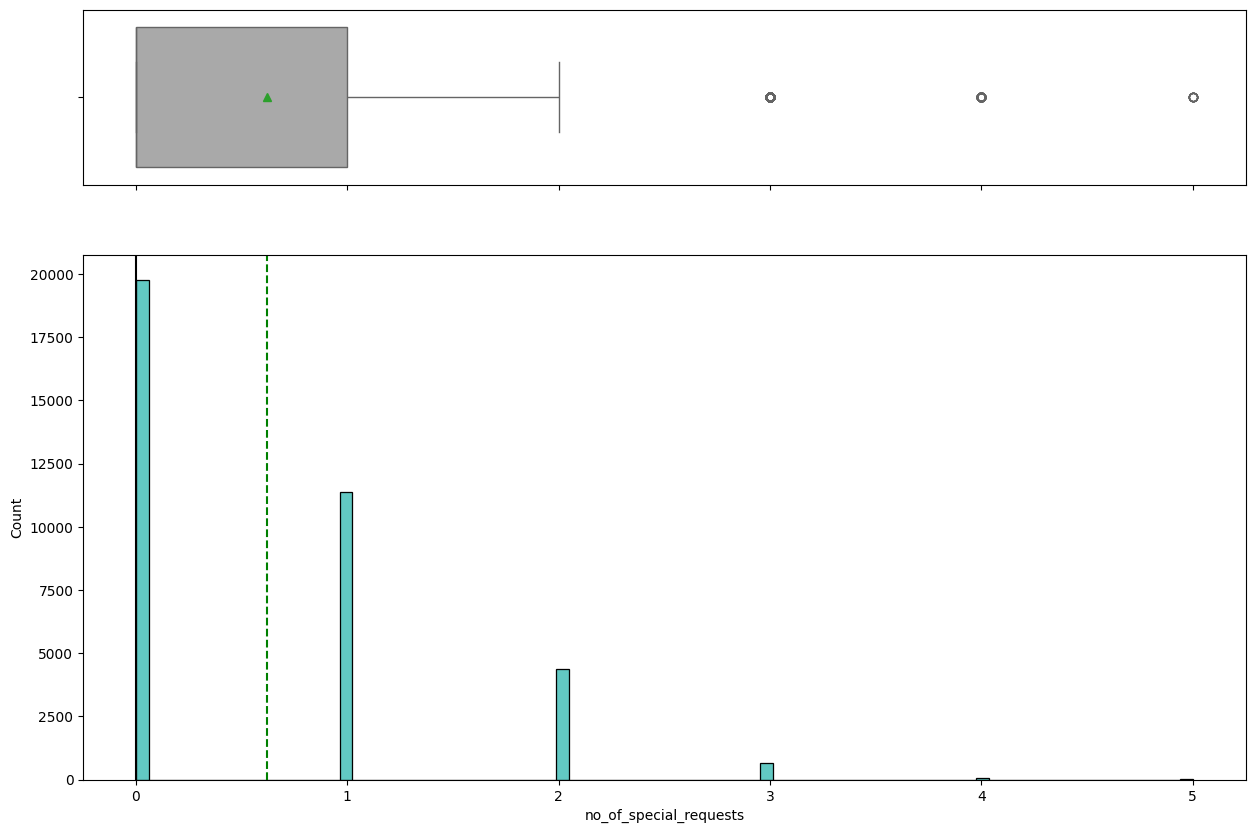

In [41]:
histogram_boxplot(df, 'no_of_special_requests')

Observations:

- Most bookings have 0 request.

- 1-2 requets also appear commonly.



In [42]:
num_col

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [43]:
cat_col

Index(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type',
       'booking_status'],
      dtype='object')

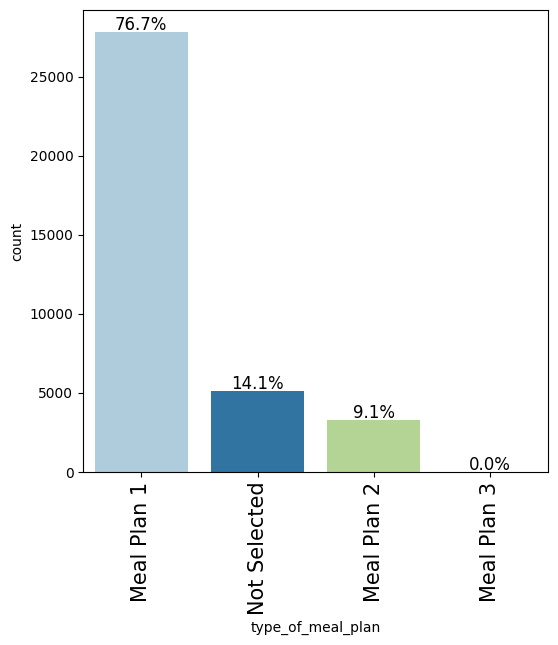

In [44]:
labeled_barplot(df, 'type_of_meal_plan', perc=True,hue= 'type_of_meal_plan')

Observations:

- Meal plan is the most preferred option with 76.7%

- Not selected 14.1% no meals needed.

- Meal plan 3 near to zero representation.

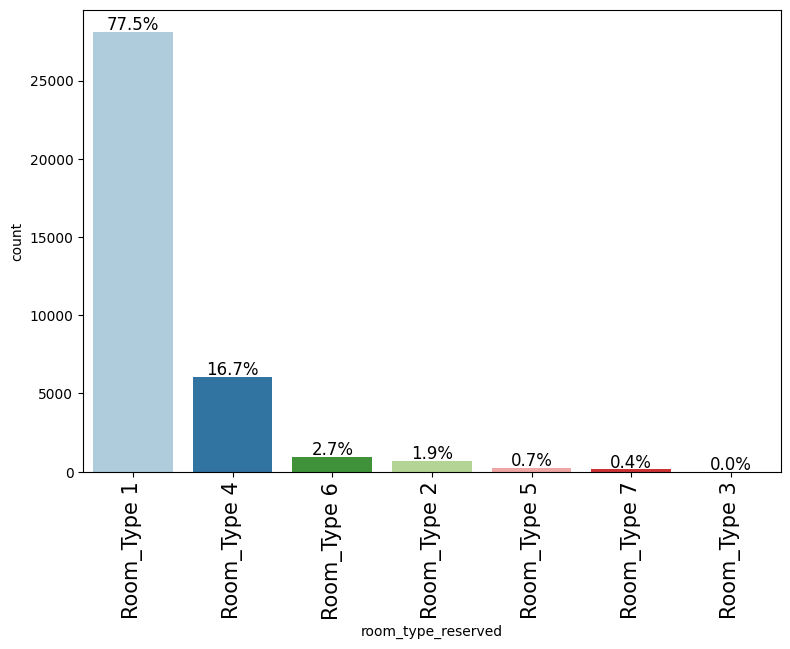

In [45]:
labeled_barplot(df, 'room_type_reserved',perc=True, hue='room_type_reserved')

Observations:

- Room type 1 most preferred with 77.5%

- Room type 4, type 6 continue with the lead with 16.7% and 2.7%.

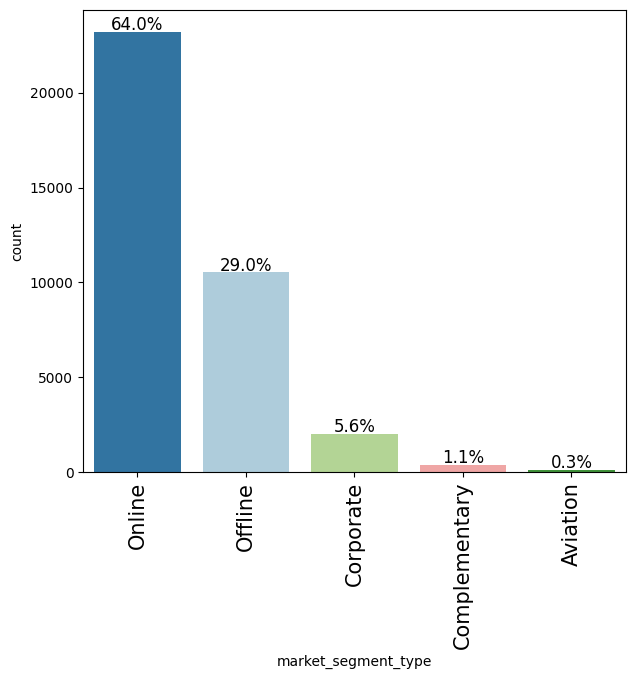

In [46]:
labeled_barplot(df, 'market_segment_type',perc=True, hue='market_segment_type')

Observations:

- Preferred maket to make bookings is Online with 64% followed by offline (in person) reservations with 29%.

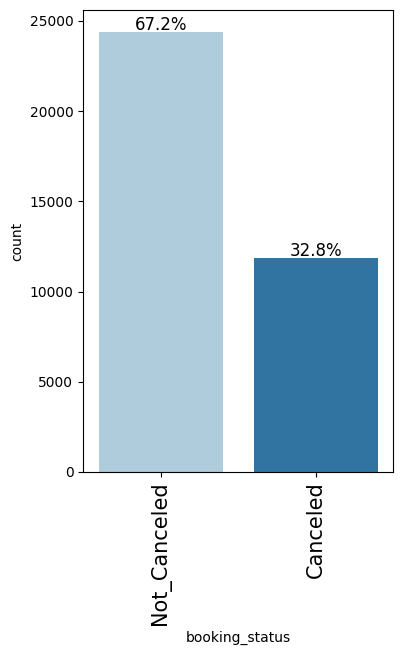

In [47]:
labeled_barplot(df, 'booking_status',perc=True, hue= 'booking_status')

Observations:

- Most of the bookings are not canceled with 67.2%, only the 32.8% is canceled.

##Bivariate Analysis

<Axes: >

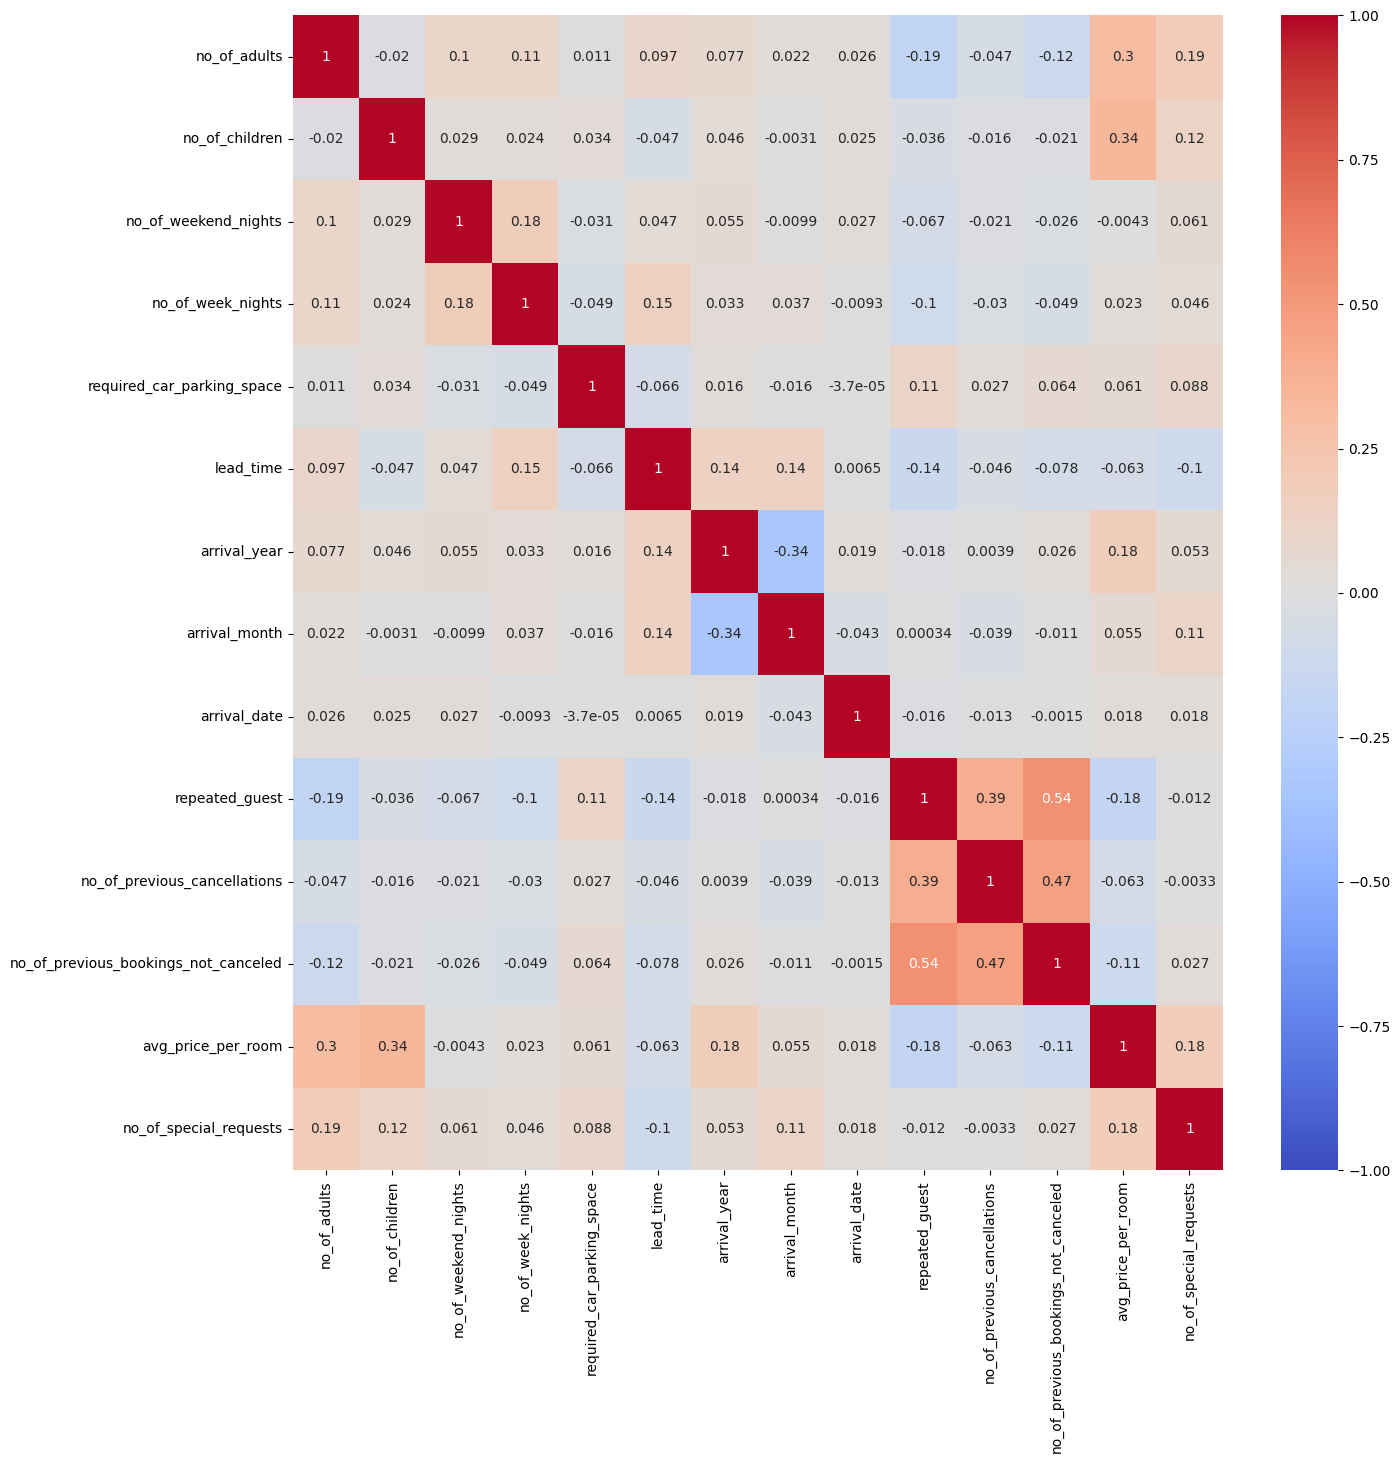

In [48]:
#Heatmap for num col
plt.figure(figsize=(15,15))
sns.heatmap(df[num_col].corr(),annot=True,vmin=-1,vmax=1,cmap='coolwarm')

Observations:

- Positive correlations:
   
   - Repeated_guest & no_of_previous_bookings_not_canceled	0.54

   - no_of_previous_bookings_not_canceled & no_of_previous_cancellations	0.47

   - no_of_children & avg_price_per_room	0.34

   - no_of_adults & avg_price_per_room	0.30

- Negative correlations:

   - arrival_year & arrival_month	−0.34

   - lead_time & no_of_special_requests	−0.10

   - repeated_guest & lead_time	−0.14

booking_status     Canceled  Not_Canceled    All
type_of_meal_plan                               
All                   11885         24390  36275
Meal Plan 1            8679         19156  27835
Not Selected           1699          3431   5130
Meal Plan 2            1506          1799   3305
Meal Plan 3               1             4      5
------------------------------------------------------------------------------------------------------------------------


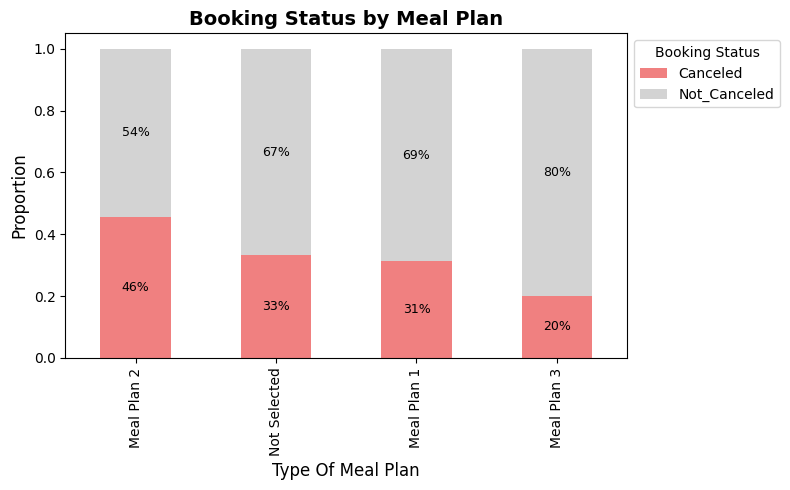

In [49]:
stacked_barplot(df,'type_of_meal_plan','booking_status',title="Booking Status by Meal Plan")

Observations:
- Meal plan 2 highest cancellation rate.

- Meal plan 1 lowest cancellation rate.

- Meal plan 3 too few samples - not statistically reliable.

booking_status      Canceled  Not_Canceled    All
room_type_reserved                               
All                    11885         24390  36275
Room_Type 1             9072         19058  28130
Room_Type 4             2069          3988   6057
Room_Type 6              406           560    966
Room_Type 2              228           464    692
Room_Type 5               72           193    265
Room_Type 7               36           122    158
Room_Type 3                2             5      7
------------------------------------------------------------------------------------------------------------------------


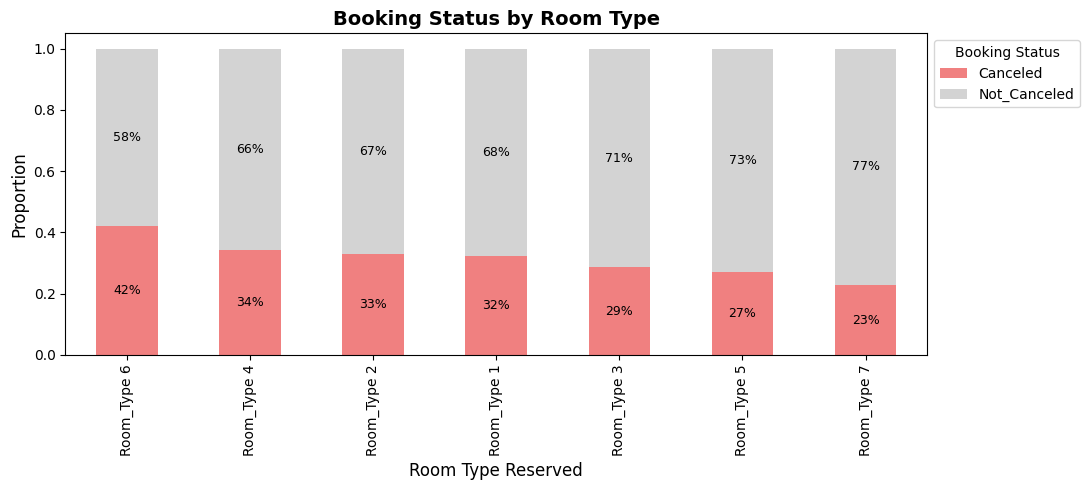

In [50]:
stacked_barplot(df,'room_type_reserved','booking_status', title="Booking Status by Room Type")

Observations:

- Room type 6 highest cacellation rate 42%.

- Room type has only 7 bookings, too few samples, not statistically reliable.

- Room type 1 has low cancellation rate 32%, is the most booked.

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     11885         24390  36275
Online                   8475         14739  23214
Offline                  3153          7375  10528
Corporate                 220          1797   2017
Aviation                   37            88    125
Complementary               0           391    391
------------------------------------------------------------------------------------------------------------------------


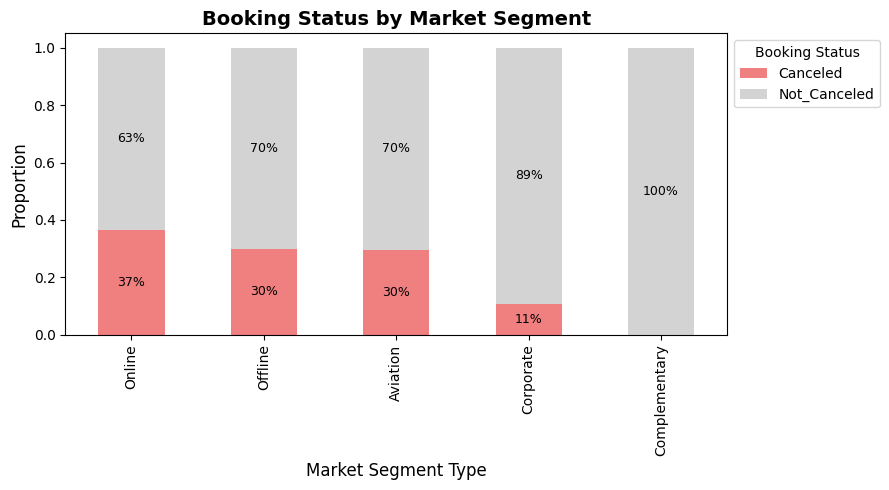

In [51]:
stacked_barplot(df,'market_segment_type','booking_status', title="Booking Status by Market Segment")

Observations:

- Online segment has the majority of total bookings with 63% not canceled.

- Offline segment has medium volume, stable behaviour with 70% not canceled.

- Corporate very low cancellation rate only 11% canceled.

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


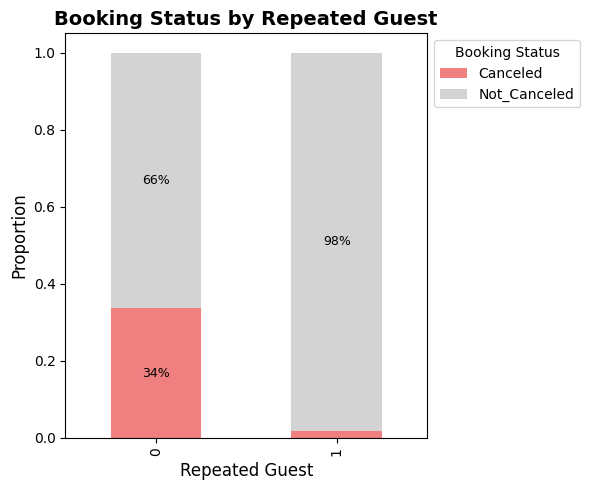

In [52]:
stacked_barplot(df,'repeated_guest','booking_status', title="Booking Status by Repeated Guest")

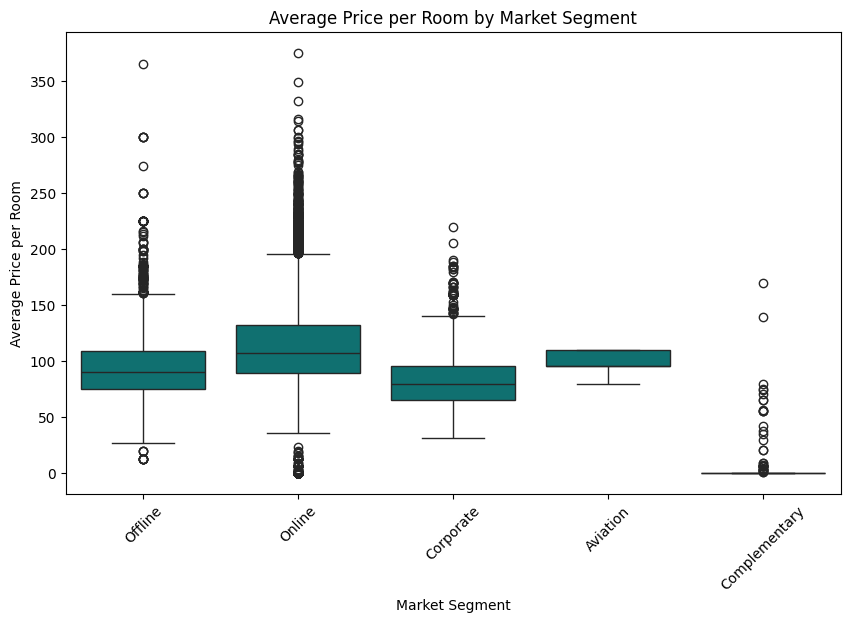

In [53]:
#Boxplot – Avg Price vs Market Segment
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="market_segment_type", y="avg_price_per_room",color='teal')
plt.title("Average Price per Room by Market Segment")
plt.xlabel("Market Segment")
plt.ylabel("Average Price per Room")
plt.xticks(rotation=45)
plt.show()

Observations:

- Online segment has the most volatile pricing and many outliers.

- Offline segment fewer outliers than online.

- Corporate and Aviations show consistent pricing.

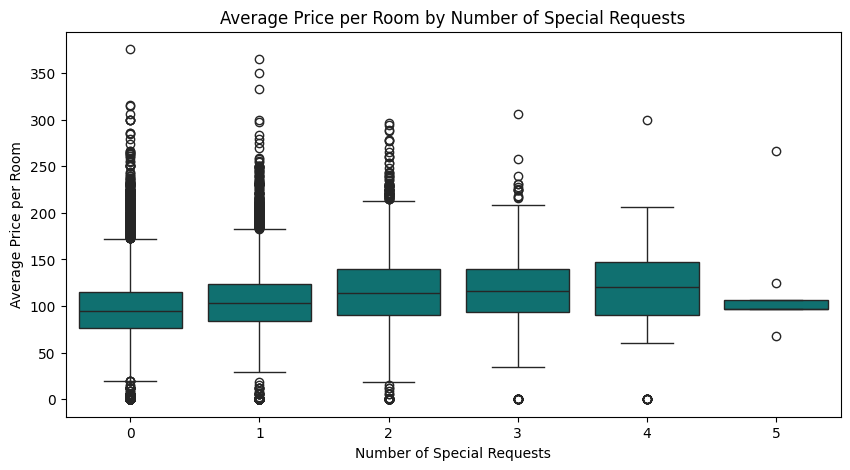

In [54]:
#Boxplot – Special Requests vs Avg Price (to see price impact)
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="no_of_special_requests", y="avg_price_per_room", color= 'teal')
plt.title("Average Price per Room by Number of Special Requests")
plt.xlabel("Number of Special Requests")
plt.ylabel("Average Price per Room")
plt.show()

Observations:
- Guest with 3 - 4 requests tend to pay more.

- Guests with 0 requests pay less.

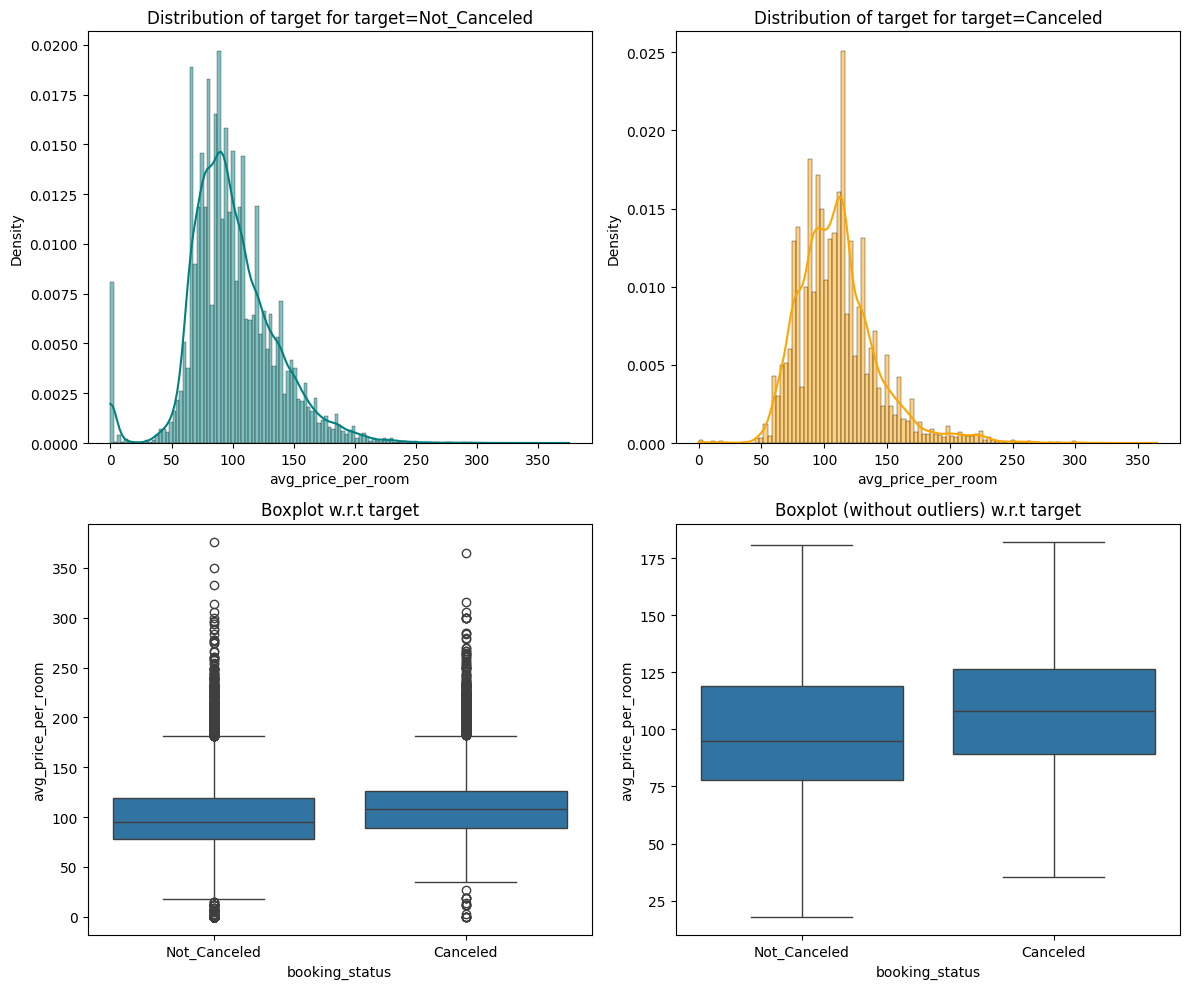

In [55]:
distribution_plot_wrt_target(df,predictor='avg_price_per_room', target='booking_status')

Observations:

- Not canceled right skewed.

- Strong density between €50 – €200

- The boxplot shows canceled bookings have higher median and upper quartile    prices.




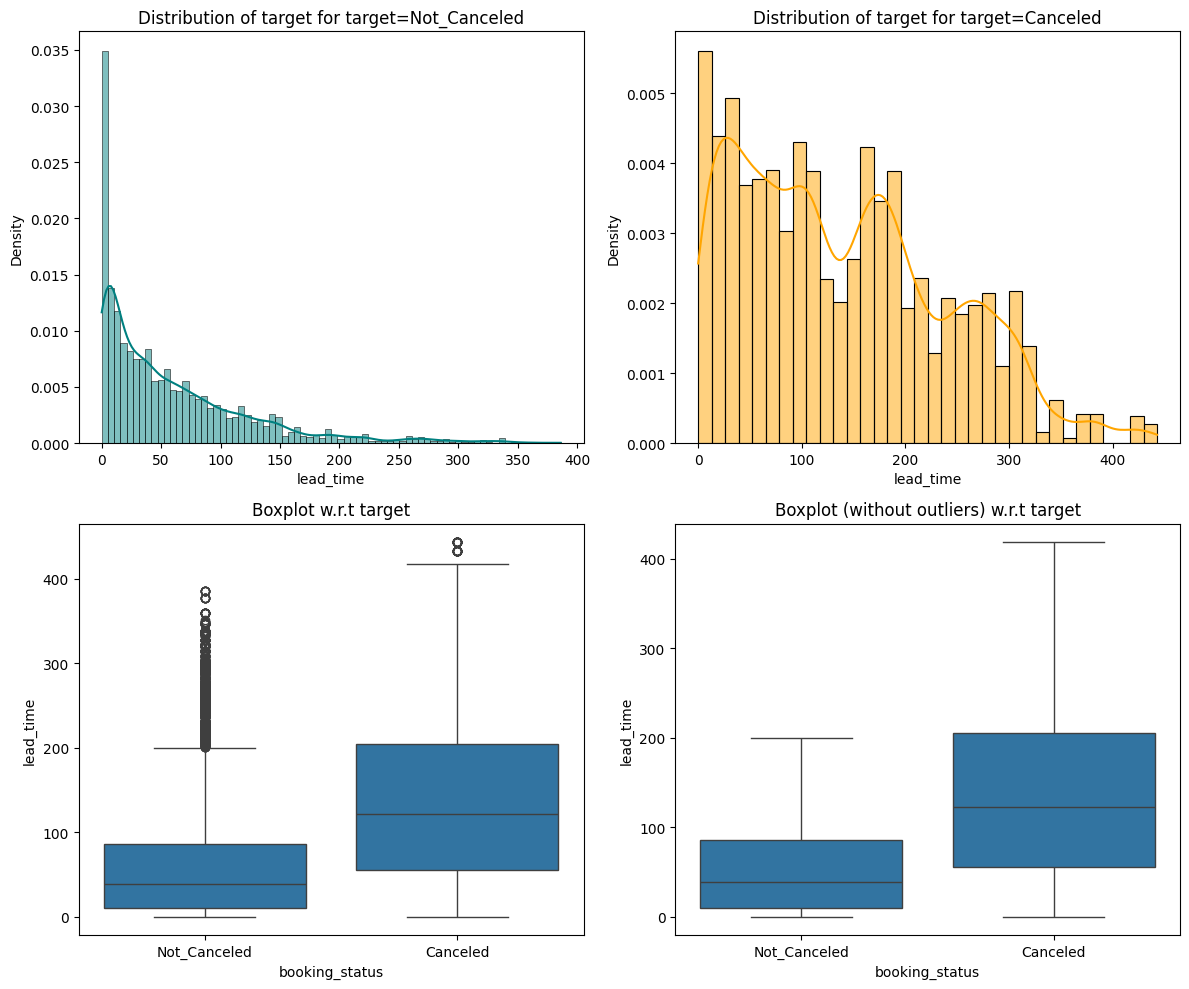

In [56]:
distribution_plot_wrt_target(df,predictor='lead_time', target='booking_status')

Observations:

- Shorter lead times are associated with kept bookings

- Longer lead times increase cancellations.

In [57]:
#Family data
#family_data = df[(df["no_of_children"] >= 0) & (df["no_of_adults"] > 1)]
#family_data.shape

In [58]:
# Family data (with .copy() to avoid SettingWithCopyWarning)
family_data = df[(df["no_of_children"] >= 0) & (df["no_of_adults"] > 1)].copy()

# Add new column safely
family_data["no_of_family_members"] = (
    family_data["no_of_adults"] + family_data["no_of_children"]
)


booking_status        Canceled  Not_Canceled    All
no_of_family_members                               
All                       9985         18456  28441
2                         8213         15506  23719
3                         1368          2425   3793
4                          398           514    912
5                            5            10     15
11                           1             0      1
12                           0             1      1
------------------------------------------------------------------------------------------------------------------------


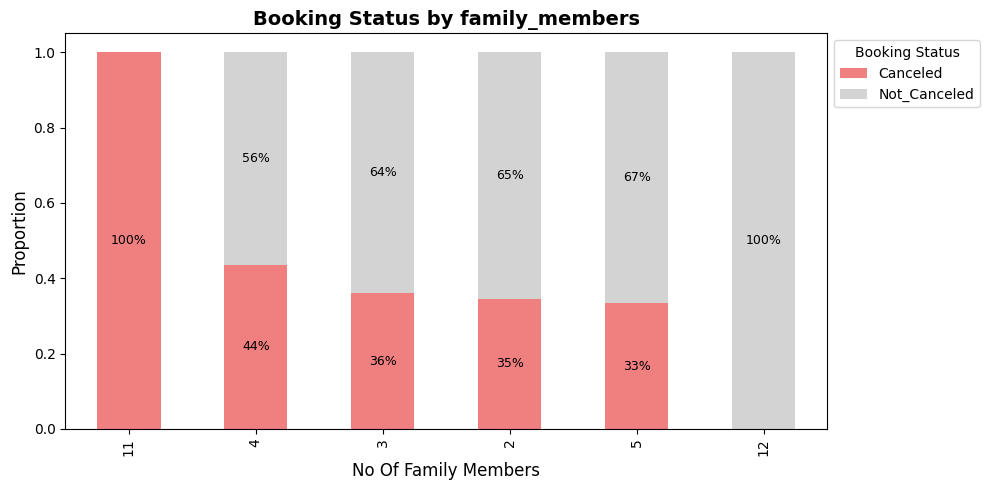

In [59]:
stacked_barplot(family_data, "no_of_family_members", "booking_status",title="Booking Status by family_members")

Observations:

- Majority of bookins with 2 family members only 35% canceled.

- Bookings with 11 or 12 familily members appears to be outliers.

- Bookings with 3 and 4 with 36% and 44% canceled respectively.

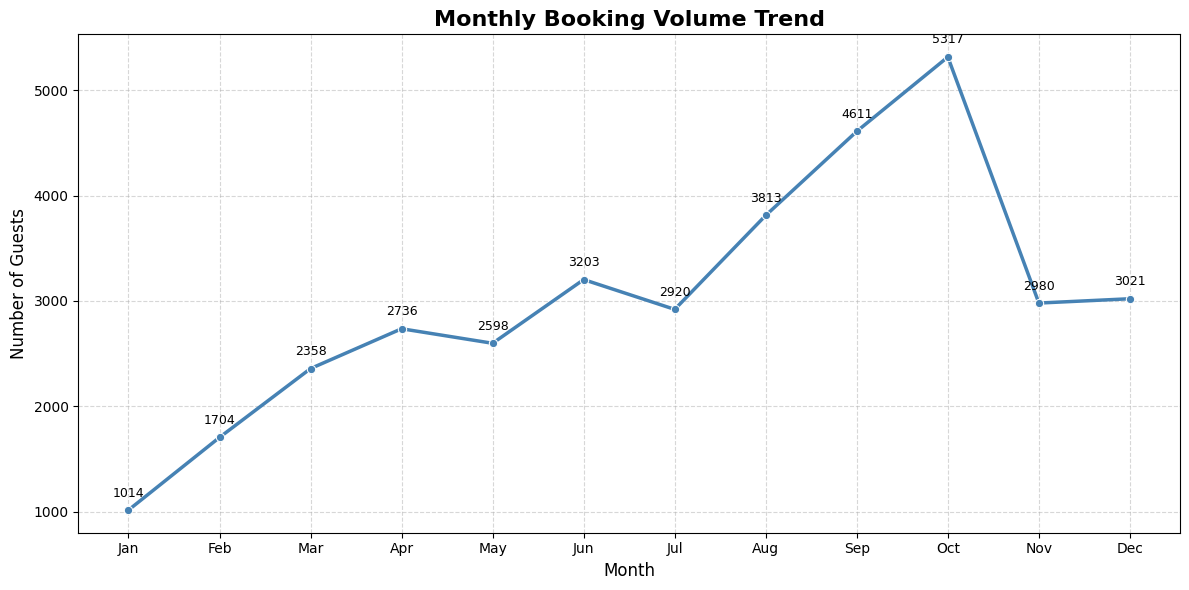

In [60]:
# Monthly booking count
monthly_data = df.groupby("arrival_month")["booking_status"].count().reset_index()
monthly_data.columns = ["Month", "Guests"]

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_data, x="Month", y="Guests", marker="o", linewidth=2.5, color="steelblue")

# Annotate values on points
for i in range(len(monthly_data)):
    plt.text(x=monthly_data["Month"][i],
             y=monthly_data["Guests"][i] + 100,
             s=monthly_data["Guests"][i],
             ha="center", va="bottom", fontsize=9)

# Styling
plt.title("Monthly Booking Volume Trend", fontsize=16, fontweight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Guests", fontsize=12)
plt.xticks(ticks=range(1, 13), labels=[
    "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
])
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


Observations:

- October has the highest bookings numbers.

- Summer season shows consistently strong performance.

- Drop in November.

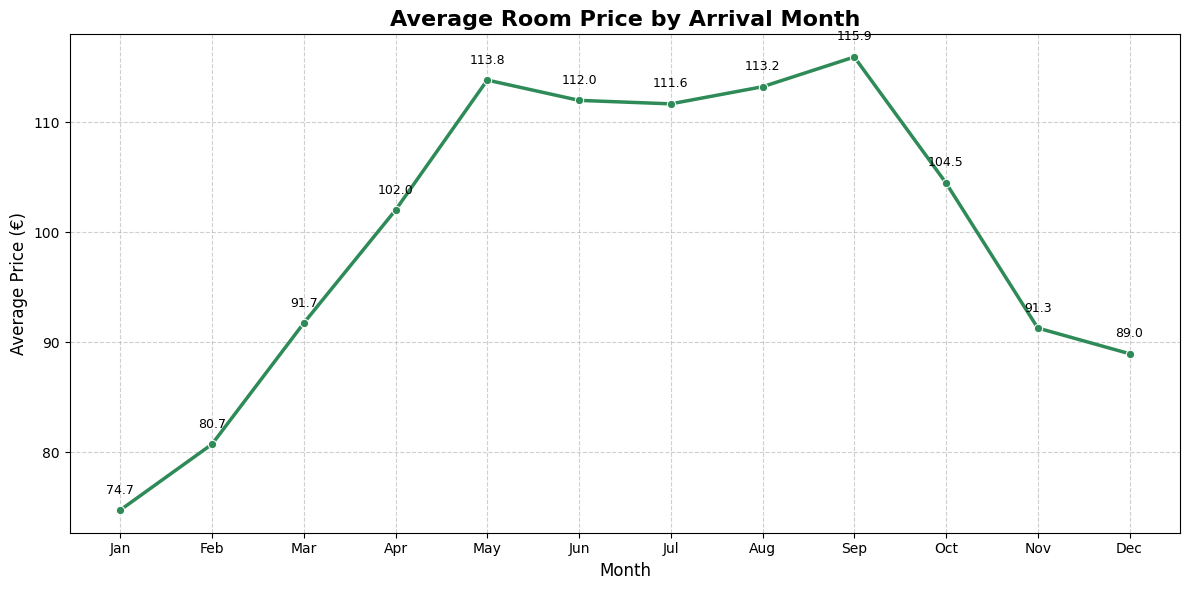

In [61]:
# Prepare monthly average price
monthly_price = df.groupby("arrival_month")["avg_price_per_room"].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=monthly_price,
    x="arrival_month",
    y="avg_price_per_room",
    marker="o",
    linewidth=2.5,
    color="seagreen"
)

# Annotate values
for i in range(len(monthly_price)):
    plt.text(
        x=monthly_price["arrival_month"][i],
        y=monthly_price["avg_price_per_room"][i] + 1.5,
        s=f"{monthly_price['avg_price_per_room'][i]:.1f}",
        ha="center",
        fontsize=9
    )

# Styling
plt.title("Average Room Price by Arrival Month", fontsize=16, fontweight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Price (€)", fontsize=12)
plt.xticks(
    ticks=range(1, 13),
    labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


Observations:

- High average prices from May to September.

- Lowest prices January and December.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

**1 - What are the busiest months in the hotel?**

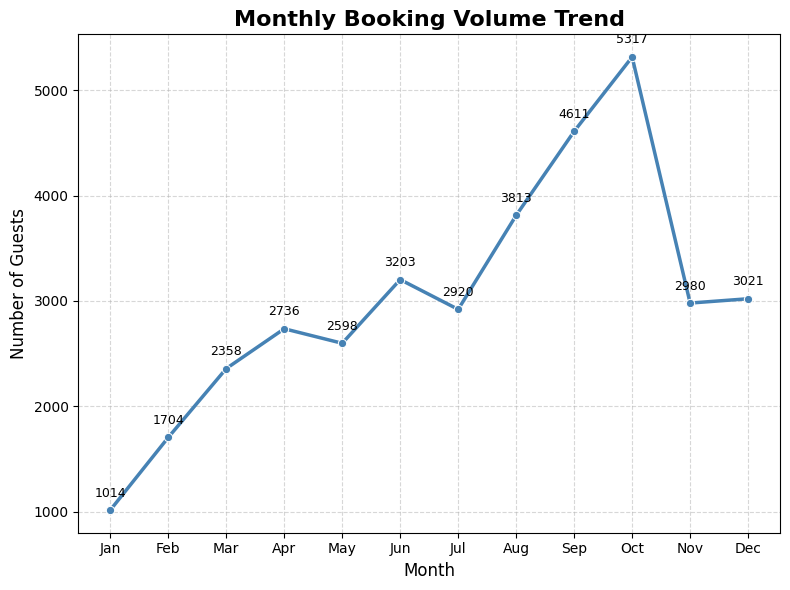

In [62]:
#1 - What are the busiest months in the hotel?
# Monthly booking count
monthly_data = df.groupby("arrival_month")["booking_status"].count().reset_index()
monthly_data.columns = ["Month", "Guests"]

# Plotting
plt.figure(figsize=(8, 6))
sns.lineplot(data=monthly_data, x="Month", y="Guests", marker="o", linewidth=2.5, color="steelblue")

# Annotate values on points
for i in range(len(monthly_data)):
    plt.text(x=monthly_data["Month"][i],
             y=monthly_data["Guests"][i] + 100,
             s=monthly_data["Guests"][i],
             ha="center", va="bottom", fontsize=9)

# Styling
plt.title("Monthly Booking Volume Trend", fontsize=16, fontweight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Guests", fontsize=12)
plt.xticks(ticks=range(1, 13), labels=[
    "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
])
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


Observations:

- October has the highest bookings numbers with 5,317.
- September follows the lead with 4,611 bookings.
- August follows the 3rd place with 3,813 bookings.

**2 - Which market segment do most of the guests come from?**

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     11885         24390  36275
Online                   8475         14739  23214
Offline                  3153          7375  10528
Corporate                 220          1797   2017
Aviation                   37            88    125
Complementary               0           391    391
------------------------------------------------------------------------------------------------------------------------


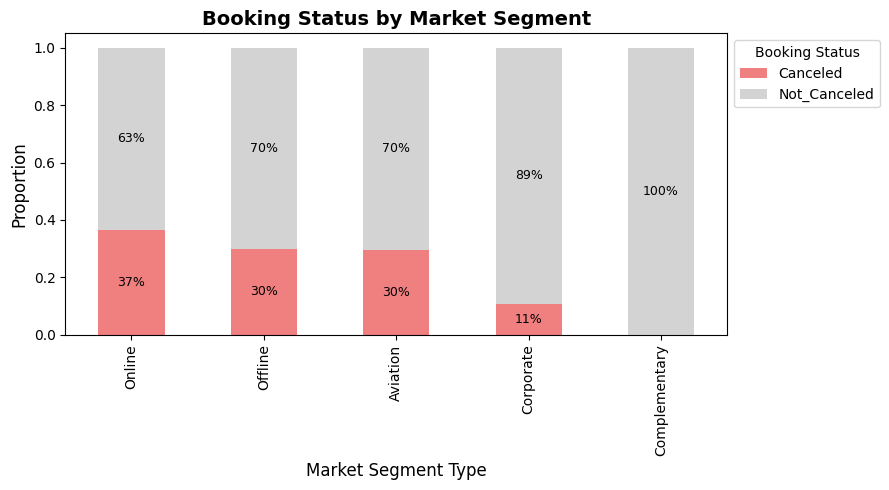

In [63]:
#2 - Which market segment do most of the guests come from?
stacked_barplot(df, "market_segment_type", "booking_status", title="Booking Status by Market Segment")

Observations:

- The most of the guests come from the market segment ONLINE with 14,739 (not canceled) and 8,475 (Canceled)

**3- Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?**

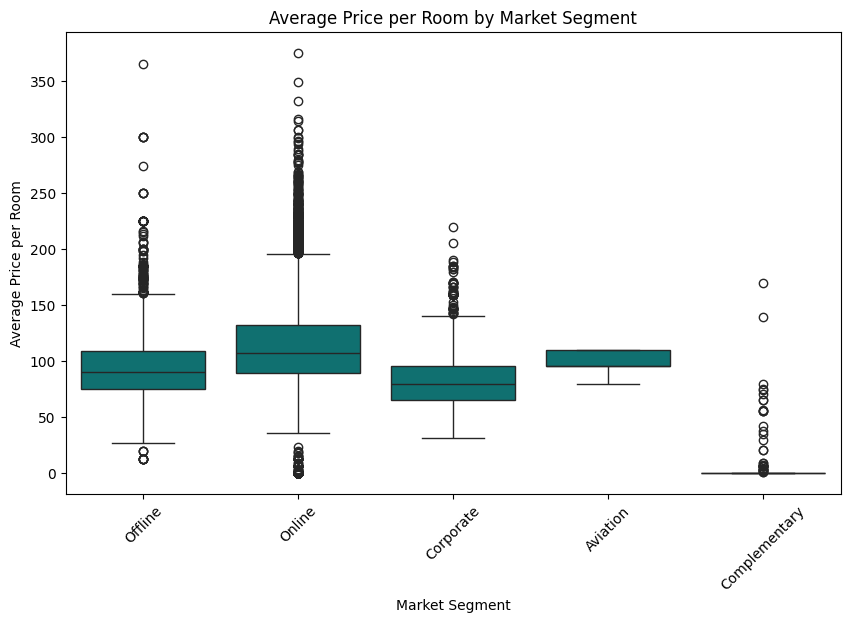

In [64]:
# What are the differences in room prices in different market segments?
#Boxplot – Avg Price vs Market Segment
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="market_segment_type", y="avg_price_per_room",color= 'teal')
plt.title("Average Price per Room by Market Segment")
plt.xlabel("Market Segment")
plt.ylabel("Average Price per Room")
plt.xticks(rotation=45)
plt.show()


Observations:

- Online segment has the most volatile pricing and many outliers.

- Offline and Online have a wide range of prices with some higher - priced ouliers.

- Corporate and Aviations show consistent pricing.

- Complementary bookings have the lowest room prices, often provided as free stays or part of promotional offers.


**4-What percentage of bookings are canceled?**

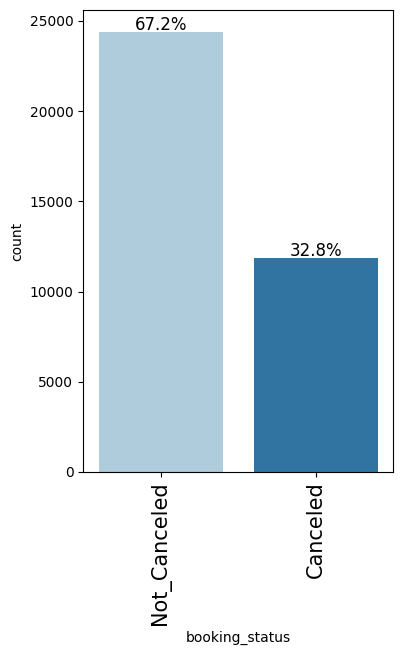

In [65]:
# What percentage of bookings are canceled?
labeled_barplot(df, 'booking_status',perc=True, hue='booking_status')

Observations:

- 32.8% of the bookings are canceled.

**5- Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?**

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


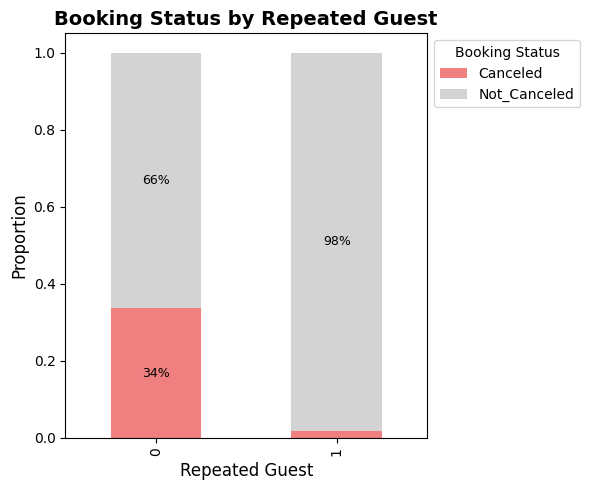

In [66]:
# What percentage of repeating guests cancel?
stacked_barplot(df,'repeated_guest','booking_status', title="Booking Status by Repeated Guest")

Observations:
- The 2% of repeted guests cancel their bookings.

**6- Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?**

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


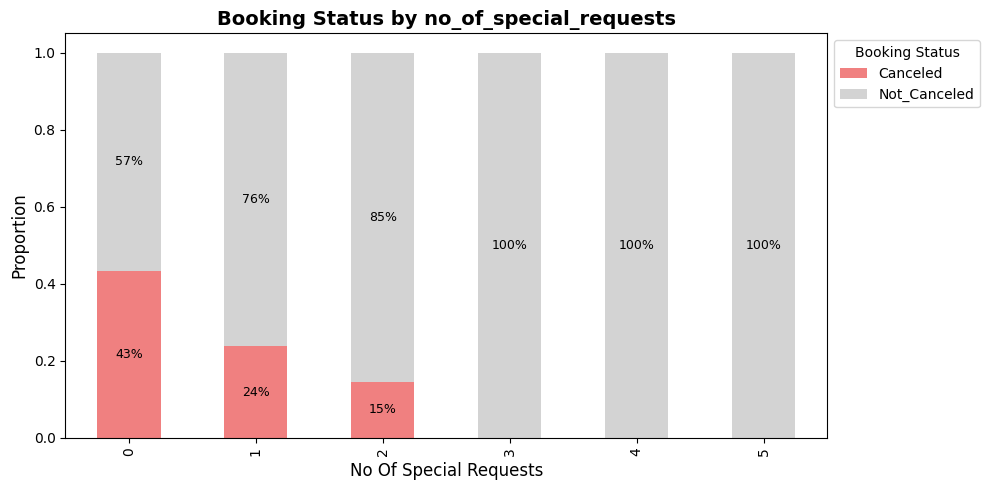

In [67]:
#Do these requirements affect booking cancellation?
stacked_barplot(df,'no_of_special_requests','booking_status', title="Booking Status by no_of_special_requests")

Observations:

Special requests don't negatively affect cancellations—they actually reduce them.

Guests with 0 requests have the highest cancellation rate at 43%

Guests with 1 or 2 requests have lower cancellation rates.

Guests with 3,4 and 5 do not cancel their bookings.


## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [68]:
#Missing value treatment (if needed)
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

Observations: The dataset does not have missing values.

In [69]:

df["booking_status"] = df["booking_status"].map({"Canceled": 1, "Not_Canceled": 0})


In [70]:
df.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2018              4            11              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests  booking_status  
0                       0               0  
1                       1               0  
2                       0               1  
3                       0               1  
4                       0               1

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

Observations:

- New variable total nights, family size.

- Booking status was converted to binary.

Outliers Detention

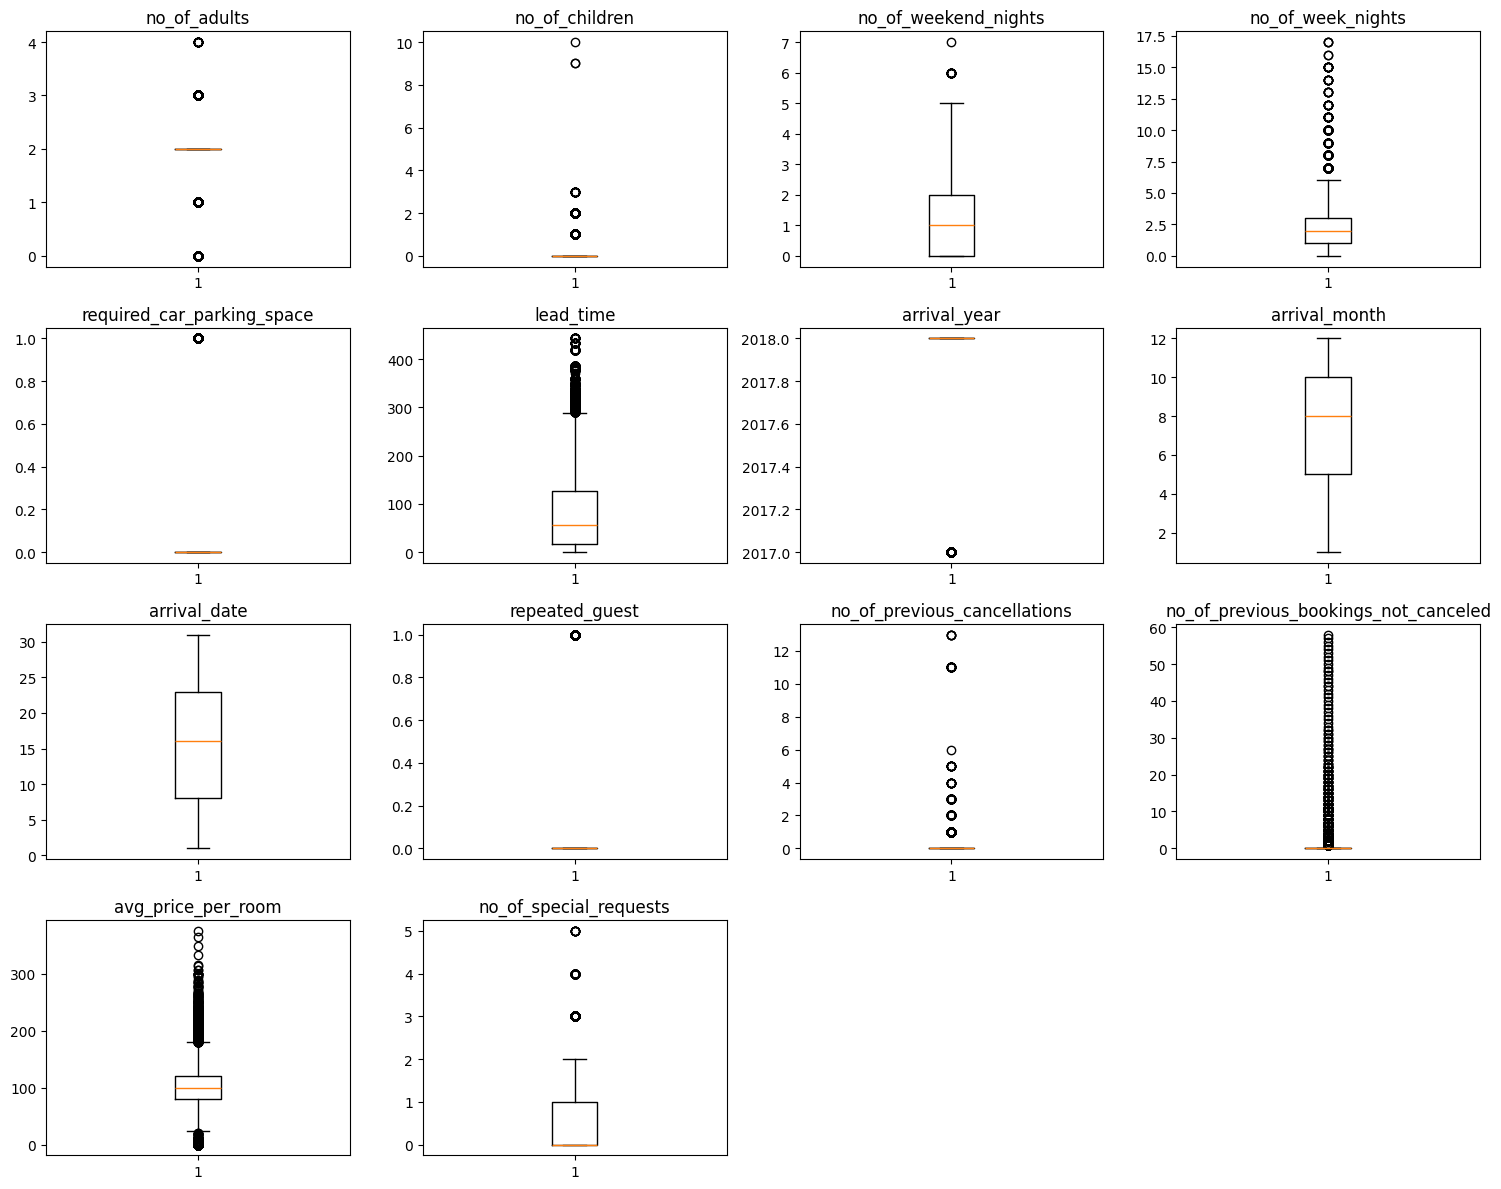

In [72]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
# dropping booking_status
numeric_columns.remove("booking_status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [73]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [74]:
#numerical_col = df.select_dtypes(include=np.number).columns.tolist()
#df = treat_outliers_all(df, numerical_col)

In [75]:
# let's look at box plot to see if outliers have been treated or not
#plt.figure(figsize=(20, 30))

#for i, variable in enumerate(numerical_col):
 #   plt.subplot(5, 4, i + 1)
  #  plt.boxplot(df[variable], whis=1.5)
   # plt.tight_layout()
    #plt.title(variable)

#plt.show()

In [76]:
#Log transformation for lead time
#df["lead_time_log"] = np.log1p(df["lead_time"])

## Preparing data for modeling

In [77]:

# specifying the independent  and dependent variables
import statsmodels.api as sm

X = df.drop(["booking_status"], axis=1)
y = df["booking_status"]


# adding a constant to the independent variables
X = sm.add_constant(X)



In [78]:
#Creating dummy variable
X= pd.get_dummies(
    X,
    columns=X.select_dtypes(include=['object','category']).columns.tolist(),
    drop_first=True
)
X.head()

const  no_of_adults  no_of_children  no_of_weekend_nights  \
0    1.0             2               0                     1   
1    1.0             2               0                     2   
2    1.0             1               0                     2   
3    1.0             2               0                     0   
4    1.0             2               0                     1   

   no_of_week_nights  required_car_parking_space  lead_time  arrival_year  \
0                  2                           0        224          2017   
1                  3                           0          5          2018   
2                  1                           0          1          2018   
3                  2                           0        211          2018   
4                  1                           0         48          2018   

   arrival_month  arrival_date  repeated_guest  no_of_previous_cancellations  \
0             10             2               0                             0   
1             11             6               0                             0   
2              2            28               0                             0   
3              5            20               0                             0   
4              4            11               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
0                       0                          False   
1                       1                          False   
2                       0                          False   
3                       0                          False   
4                       0                          False   

   type_of_meal_plan_Meal Plan 3  type_of_meal_plan_Not Selected  \
0                          False                           False   
1                          False                            True   
2                          False                           False   
3                          False                           False   
4                          False                            True   

   room_type_reserved_Room_Type 2  room_type_reserved_Room_Type 3  \
0                           False                           False   
1                           False                           False   
2                           False                           False   
3                           False                           False   
4                           False                           False   

   room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
0                           False                           False   
1                           False                           False   
2                           False                           False   
3                           False                           False   
4                           False                           False   

   room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
0                           False                           False   
1                           False                           False   
2                           False                           False   
3                           False                           False   
4                           False                           False   

   market_segment_type_Complementary  market_segment_type_Corporate  \
0                              False                          False   
1                              False                          False   
2                              False                          False

In [79]:
#converting the imput attributes into float
X = X.astype(float)
X.head()

const  no_of_adults  no_of_children  no_of_weekend_nights  \
0    1.0           2.0             0.0                   1.0   
1    1.0           2.0             0.0                   2.0   
2    1.0           1.0             0.0                   2.0   
3    1.0           2.0             0.0                   0.0   
4    1.0           2.0             0.0                   1.0   

   no_of_week_nights  required_car_parking_space  lead_time  arrival_year  \
0                2.0                         0.0      224.0        2017.0   
1                3.0                         0.0        5.0        2018.0   
2                1.0                         0.0        1.0        2018.0   
3                2.0                         0.0      211.0        2018.0   
4                1.0                         0.0       48.0        2018.0   

   arrival_month  arrival_date  repeated_guest  no_of_previous_cancellations  \
0           10.0           2.0             0.0                           0.0   
1           11.0           6.0             0.0                           0.0   
2            2.0          28.0             0.0                           0.0   
3            5.0          20.0             0.0                           0.0   
4            4.0          11.0             0.0                           0.0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                   0.0               65.00   
1                                   0.0              106.68   
2                                   0.0               60.00   
3                                   0.0              100.00   
4                                   0.0               94.50   

   no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
0                     0.0                            0.0   
1                     1.0                            0.0   
2                     0.0                            0.0   
3                     0.0                            0.0   
4                     0.0                            0.0   

   type_of_meal_plan_Meal Plan 3  type_of_meal_plan_Not Selected  \
0                            0.0                             0.0   
1                            0.0                             1.0   
2                            0.0                             0.0   
3                            0.0                             0.0   
4                            0.0                             1.0   

   room_type_reserved_Room_Type 2  room_type_reserved_Room_Type 3  \
0                             0.0                             0.0   
1                             0.0                             0.0   
2                             0.0                             0.0   
3                             0.0                             0.0   
4                             0.0                             0.0   

   room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
0                             0.0                             0.0   
1                             0.0                             0.0   
2                             0.0                             0.0   
3                             0.0                             0.0   
4                             0.0                             0.0   

   room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
0                             0.0                             0.0   
1                             0.0                             0.0   
2                             0.0                             0.0   
3                             0.0                             0.0   
4                             0.0                             0.0   

   market_segment_type_Complementary  market_segment_type_Corporate  \
0                                0.0                            0.0   
1                                0.0                            0.0   
2                                0.0                            0.0

In [80]:
#splitting the data in 70:30 ratio for train to test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [81]:
print('The number of rows in the train data set = ', X_train.shape[0])
print('The number of rows in the test data set = ', X_test.shape[0])

The number of rows in the train data set =  25392
The number of rows in the test data set =  10883


In [82]:

print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 28)
Shape of test set :  (10883, 28)
Percentage of classes in training set:
booking_status
0    0.670644
1    0.329356
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
0    0.676376
1    0.323624
Name: proportion, dtype: float64


## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [84]:

#checking vif for xtrain ascending false
checking_vif(X_train).sort_values(by='VIF', ascending=False)

feature           VIF
0                                  const  3.949119e+07
27            market_segment_type_Online  7.117686e+01
26           market_segment_type_Offline  6.411425e+01
25         market_segment_type_Corporate  1.692846e+01
24     market_segment_type_Complementary  4.502286e+00
13                    avg_price_per_room  2.064208e+00
2                         no_of_children  1.978622e+00
22        room_type_reserved_Room_Type 6  1.974902e+00
10                        repeated_guest  1.783612e+00
12  no_of_previous_bookings_not_canceled  1.651996e+00
7                           arrival_year  1.431668e+00
11          no_of_previous_cancellations  1.395688e+00
6                              lead_time  1.395178e+00
20        room_type_reserved_Room_Type 4  1.362614e+00
1                           no_of_adults  1.348486e+00
8                          arrival_month  1.276373e+00
15         type_of_meal_plan_Meal Plan 2  1.273250e+00
17        type_of_meal_plan_Not Selected  1.272519e+00
14                no_of_special_requests  1.247302e+00
23        room_type_reserved_Room_Type 7  1.115594e+00
18        room_type_reserved_Room_Type 2  1.101505e+00
4                      no_of_week_nights  1.095670e+00
3                   no_of_weekend_nights  1.069487e+00
5             required_car_parking_space  1.039977e+00
21        room_type_reserved_Room_Type 5  1.027970e+00
16         type_of_meal_plan_Meal Plan 3  1.025217e+00
9                           arrival_date  1.006735e+00
19        room_type_reserved_Room_Type 3  1.003303e+00

Observations:

Hihg vif:

- market_segment_type_Online	7.117686e+01
- market_segment_type_Offline	6.411425e+01

Removing multicolinearity

In [85]:
col_to_drop = "market_segment_type_Online"
x_train2 = X_train.loc[:, ~X_train.columns.str.startswith(col_to_drop)]
x_test2 = X_test.loc[:, ~X_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  market_segment_type_Online


feature           VIF
0                                  const  3.941419e+07
1                           no_of_adults  1.332128e+00
2                         no_of_children  1.977745e+00
3                   no_of_weekend_nights  1.069052e+00
4                      no_of_week_nights  1.095122e+00
5             required_car_parking_space  1.039843e+00
6                              lead_time  1.390896e+00
7                           arrival_year  1.429208e+00
8                          arrival_month  1.275321e+00
9                           arrival_date  1.006718e+00
10                        repeated_guest  1.780288e+00
11          no_of_previous_cancellations  1.395447e+00
12  no_of_previous_bookings_not_canceled  1.651755e+00
13                    avg_price_per_room  2.063363e+00
14                no_of_special_requests  1.242444e+00
15         type_of_meal_plan_Meal Plan 2  1.272893e+00
16         type_of_meal_plan_Meal Plan 3  1.025217e+00
17        type_of_meal_plan_Not Selected  1.270718e+00
18        room_type_reserved_Room_Type 2  1.101337e+00
19        room_type_reserved_Room_Type 3  1.003302e+00
20        room_type_reserved_Room_Type 4  1.357091e+00
21        room_type_reserved_Room_Type 5  1.027970e+00
22        room_type_reserved_Room_Type 6  1.974559e+00
23        room_type_reserved_Room_Type 7  1.115473e+00
24     market_segment_type_Complementary  1.340859e+00
25         market_segment_type_Corporate  1.527998e+00
26           market_segment_type_Offline  1.598872e+00

Observations:

no more high VIF observed.

In [86]:
#Printing high vif >5
vif[vif["VIF"] > 5]

feature           VIF
0   const  3.941419e+07

## Building a Logistic Regression model

In [87]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [88]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [89]:
# fitting logistic regression model
logit = sm.Logit(y_train, x_train2.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25365
Method:                           MLE   Df Model:                           26
Date:                Sat, 21 Jun 2025   Pseudo R-squ.:                  0.3292
Time:                        02:27:07   Log-Likelihood:                -10795.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -932.8832    120.654     -7.732      0.000   -1169.361    -696.405
no_of_adults                             0.1061      

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Observations:

- Very large coefficients → see Meal Plan 3 and Market Segment Complementary huge values → possible collinearity or sparse data

## Model performance evaluation

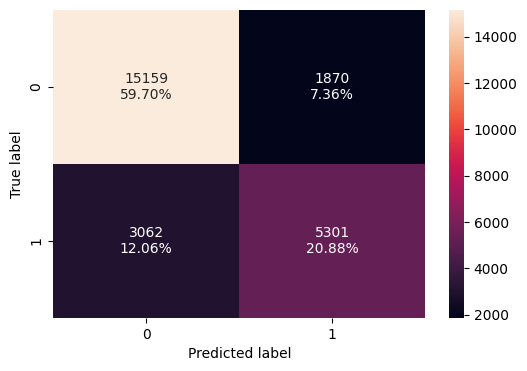

In [90]:
confusion_matrix_statsmodels(lg, x_train2, y_train)

In [91]:
print("Training performance:")
model_performance_classification_statsmodels(lg, x_train2, y_train)

Training performance:


Accuracy    Recall  Precision        F1
0  0.805766  0.633863   0.739227  0.682503

Removing high p-value variables

In [92]:
# initial list of columns
cols = x_train2.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = x_train2[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [93]:
X_train3 = x_train2[selected_features]

In [94]:
logit3 = sm.Logit(y_train, X_train3.astype(float))
lg3 = logit3.fit(disp=False)

print(lg3.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Sat, 21 Jun 2025   Pseudo R-squ.:                  0.3282
Time:                        02:27:09   Log-Likelihood:                -10810.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -916.8647    120.456     -7.612      0.000   -1152.953    -680.776
no_of_adults                       0.1087      0.037      2.916      0.

In [95]:
print("Training performance:")
model_performance_classification_statsmodels(lg3, X_train3, y_train)

Training performance:


Accuracy    Recall  Precision        F1
0  0.805372  0.632429   0.738997  0.681572

In [96]:
# converting coefficients to odds
odds = np.exp(lg3.params)

# finding the percentage change
perc_change_odds = (np.exp(lg3.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train3.columns).T

const  no_of_adults  no_of_children  no_of_weekend_nights  \
Odds           0.0      1.114870        1.164107              1.114662   
Change_odd% -100.0     11.487012       16.410722             11.466158   

             no_of_week_nights  required_car_parking_space  lead_time  \
Odds                  1.042600                    0.202976   1.015834   
Change_odd%           4.259964                  -79.702424   1.583420   

             arrival_year  arrival_month  repeated_guest  \
Odds             1.572905       0.958414        0.064839   
Change_odd%     57.290540      -4.158584      -93.516077   

             no_of_previous_cancellations  avg_price_per_room  \
Odds                             1.257046            1.019374   
Change_odd%                     25.704603            1.937389   

             no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
Odds                       0.229933                       1.178549   
Change_odd%              -77.006720                      17.854886   

             type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
Odds                               1.331035                        0.700689   
Change_odd%                       33.103474                      -29.931089   

             room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
Odds                               0.753265                        0.478935   
Change_odd%                      -24.673455                      -52.106542   

             room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
Odds                               0.380337                        0.238400   
Change_odd%                      -61.966306                      -76.159988   

             market_segment_type_Corporate  market_segment_type_Offline  
Odds                              0.452620                      0.16771  
Change_odd%                     -54.737981                    -83.22899

Observations:

- Almost all key variables have p < 0.05, meaning they are statistically significant predictors.

- Accuracy = 80.53%.

Recall (Sensitivity) = 63.24% .

Precision = 73.90%

F1 Score = 68.15%



Checking performance of the new model

Training set performance

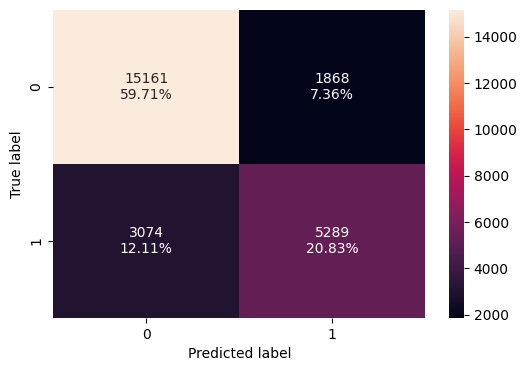

In [97]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_train3, y_train)

In [98]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg3, X_train3, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.805372  0.632429   0.738997  0.681572

Observations:

Test set performance

In [99]:
X_test3 = X_test[list(X_train3.columns)]

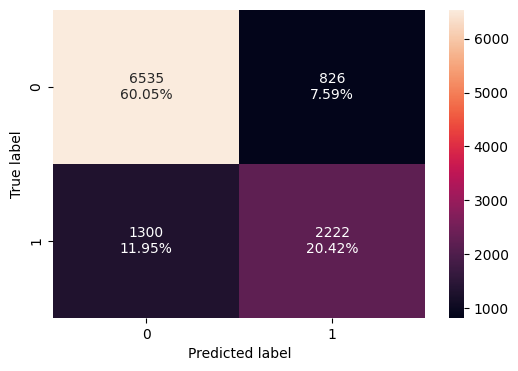

In [100]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test3, y_test)

In [101]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg3, X_test3, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


Accuracy    Recall  Precision        F1
0  0.804649  0.630892   0.729003  0.676408

Observations:

-  Recall ~63% — the model is recovering ~63% of actual cancellations.

- Precision ~73% — when it predicts a cancellation, it is correct about 73% of the time.

- F1 Score ~67–68% — fairly balanced.

## Model Performance Improvement

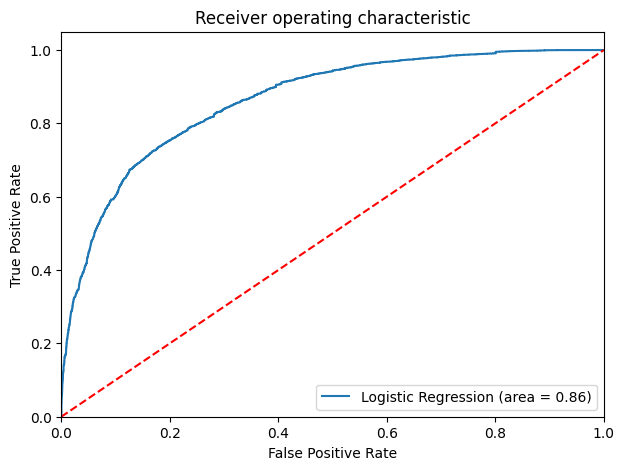

In [102]:
import statsmodels.api as sm
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

logit_roc_auc_train = roc_auc_score(y_train, lg3.predict(X_train3))
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(X_train3))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

Observations:

Optimal threshold using AUC-ROC curve

In [103]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(X_train3))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3696037915893021


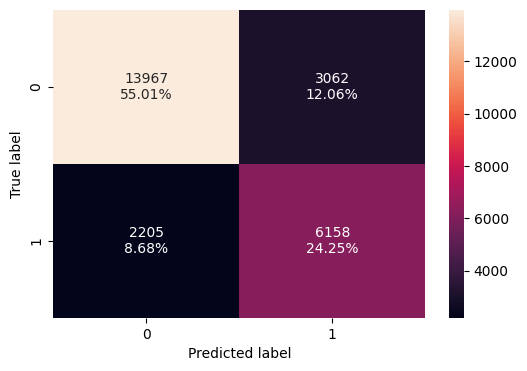

In [104]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg3, X_train3, y_train, threshold=optimal_threshold_auc_roc
)

In [105]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg3, X_train3, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy    Recall  Precision        F1
0  0.792572  0.736339   0.667896  0.700449

Checking model performance on test set

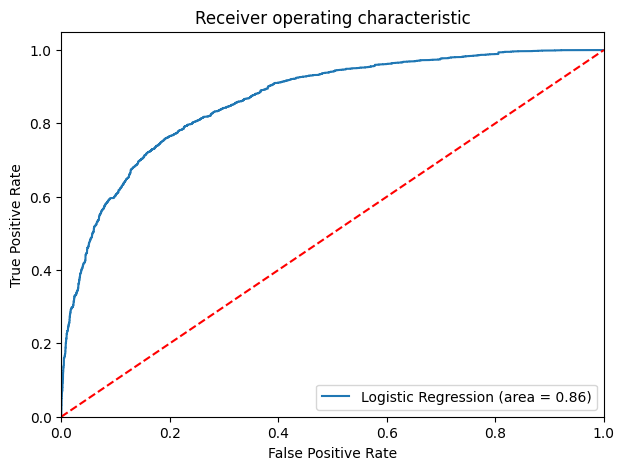

In [106]:
logit_roc_auc_train = roc_auc_score(y_test, lg3.predict(X_test3))
fpr, tpr, thresholds = roc_curve(y_test, lg3.predict(X_test3))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

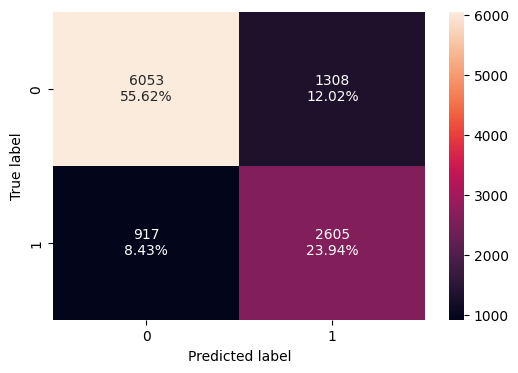

In [107]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test3, y_test, threshold=optimal_threshold_auc_roc)

Observations:

-  Recall improved significantly — from ~63% → ~74%

- Slight trade-off in Precision (~73.9% → ~66.6%).



In [108]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg3, X_test3, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


Accuracy    Recall  Precision       F1
0  0.795553  0.739637    0.66573  0.70074

Precision-Recall Curve

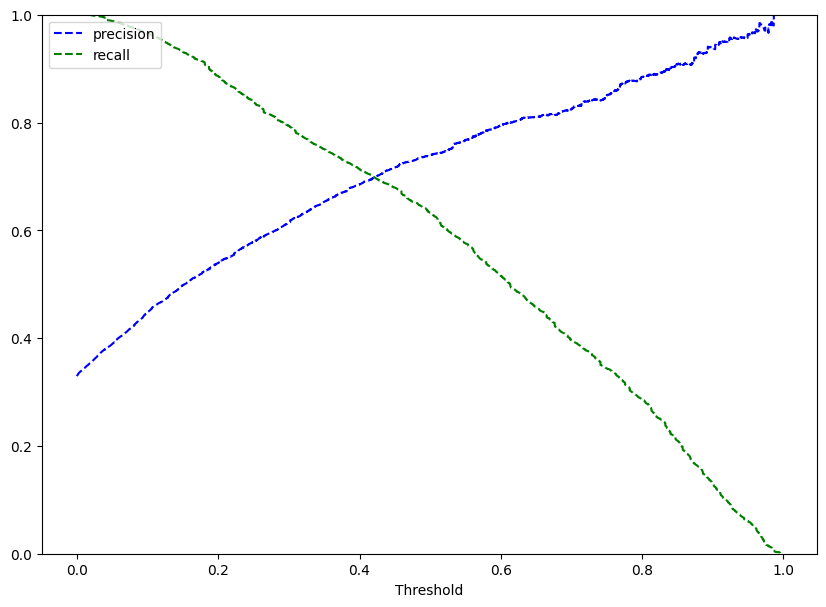

In [109]:
from sklearn.metrics import precision_recall_curve
y_scores = lg3.predict(X_train3)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [110]:
from sklearn.metrics import f1_score

# Compute F1 for each threshold
f1_scores = 2 * (prec * rec) / (prec + rec + 1e-10)
best_thresh = tre[np.argmax(f1_scores)]
print(f"Optimal threshold (by max F1): {best_thresh:.2f}")


Optimal threshold (by max F1): 0.39


In [111]:
# setting the threshold
optimal_threshold_curve = 0.39

In [112]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg3, X_train3, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy    Recall  Precision        F1
0  0.796393  0.721272   0.679968  0.700012

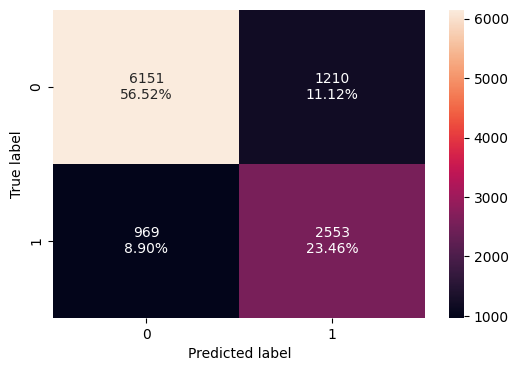

In [113]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test3, y_test, threshold=optimal_threshold_curve)

In [114]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg3, X_test3, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy    Recall  Precision        F1
0  0.799779  0.724872   0.678448  0.700892

Observations:

- Balanced model — F1 score is optimized (~70%) across both train and test.

- Recall improved (~72%) — good catch rate for cancellations.

- Precision slightly lower (~68%) but acceptable for business use if priority is to capture cancellations.



# setting the threshold
optimal_threshold_curve = 0.35

In [115]:
# setting the threshold
optimal_threshold_curve = 0.35


Checking model performance on training set

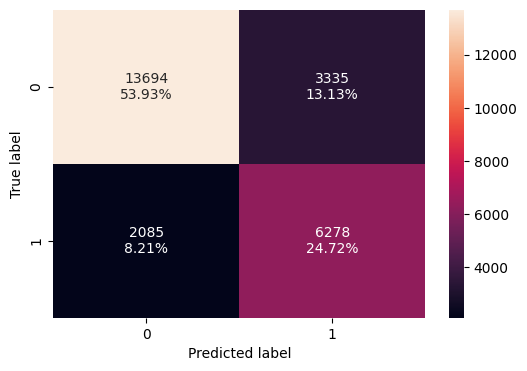

In [116]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_train3, y_train, threshold=optimal_threshold_curve)

In [117]:
log_reg_model_train_perf_threshold_curve_035 = model_performance_classification_statsmodels(
    lg3, X_train3, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy    Recall  Precision        F1
0  0.796393  0.721272   0.679968  0.700012

Checking model performance on test set

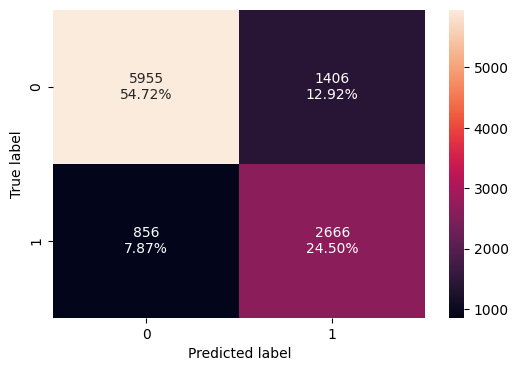

In [118]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test3, y_test, threshold=optimal_threshold_curve)

In [119]:
log_reg_model_test_perf_threshold_curve_035 = model_performance_classification_statsmodels(
    lg3, X_test3, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy    Recall  Precision        F1
0  0.799779  0.724872   0.678448  0.700892

Observations:

- Recall is now very strong — ~75%

- F1 score is the best so far — ~70.21% on test set.

- Slight drop in Precision (as expected with higher Recall).

- Accuracy is still strong ~79.2%.

Model Performance Comparison and Final Model Selection

## Final Model Summary

In [120]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
        log_reg_model_train_perf_threshold_curve_035.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.39 Threshold",
    "Logistic Regression-0.35 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                      0.805372   
Recall                                        0.632429   
Precision                                     0.738997   
F1                                            0.681572   

           Logistic Regression-0.37 Threshold  \
Accuracy                             0.792572   
Recall                               0.736339   
Precision                            0.667896   
F1                                   0.700449   

           Logistic Regression-0.39 Threshold  \
Accuracy                             0.796393   
Recall                               0.721272   
Precision                            0.679968   
F1                                   0.700012   

           Logistic Regression-0.35 Threshold  
Accuracy                             0.786547  
Recall                               0.750688  
Precision                            0.653074  
F1                                   0.698487

In [121]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
        log_reg_model_test_perf_threshold_curve_035.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.39 Threshold",
    "Logistic Regression-0.35 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df


Test set performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                      0.804649   
Recall                                        0.630892   
Precision                                     0.729003   
F1                                            0.676408   

           Logistic Regression-0.37 Threshold  \
Accuracy                             0.795553   
Recall                               0.739637   
Precision                            0.665730   
F1                                   0.700740   

           Logistic Regression-0.39 Threshold  \
Accuracy                             0.799779   
Recall                               0.724872   
Precision                            0.678448   
F1                                   0.700892   

           Logistic Regression-0.35 Threshold  
Accuracy                             0.792153  
Recall                               0.756956  
Precision                            0.654715  
F1                                   0.702133

Observations:

- The logistics regression model with 0.35 treshold appears to be the best for prediction booking cancellations.  

- Very good recall, decent precision and the best F1 Score (balanced   performance).

## Conclusion: Logistic Regression Model

The logistic regression model was developed to predict the probability of booking cancellations based on various customer and booking attributes.

Multiple treshold were tested  (0.35,0.39, 0.37, 0.50) to fine-tune the balance between recall and precision.

Threshold = 0.35 was the best balance with:

 - Training Set:

 - Accuracy: 78.6%

 - Recall: 75.1%

 - Precision: 65.3%

 - F1 Score: 69.8%

Test Set:

 - Accuracy: 79.8%

 - Recall: 75.69%

 - Precision: 65.47%

 - F1 Score: 70.21%


 The recall is the most important metric in this domain, as the hotel would want to identify as many potential cancellations as possible in order to take necessary follow up.



## Building a Decision Tree model

Creating training and test sets.

In [122]:
df.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2018              4            11              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests  booking_status  
0                       0               0  
1                       1               0  
2                       0               1  
3                       0               1  
4                       0               1

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [124]:
X = df.drop(["booking_status"], axis=1)
Y = df["booking_status"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [125]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
booking_status
0    0.670644
1    0.329356
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
0    0.676376
1    0.323624
Name: proportion, dtype: float64


## Decision Tree (default)

In [126]:
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

Model Evaluation

In [127]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [128]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

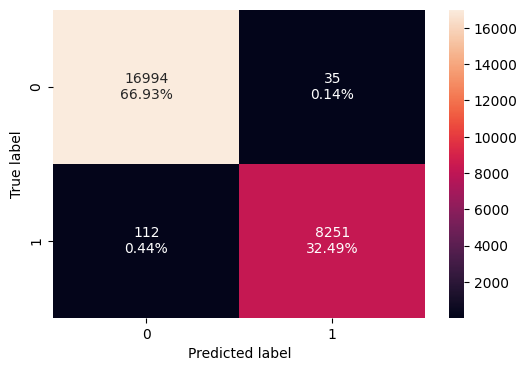

In [129]:
confusion_matrix_sklearn(model0, X_train, y_train)

In [130]:
decision_tree_perf_train_without = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_perf_train_without

Accuracy    Recall  Precision        F1
0  0.994211  0.986608   0.995776  0.991171

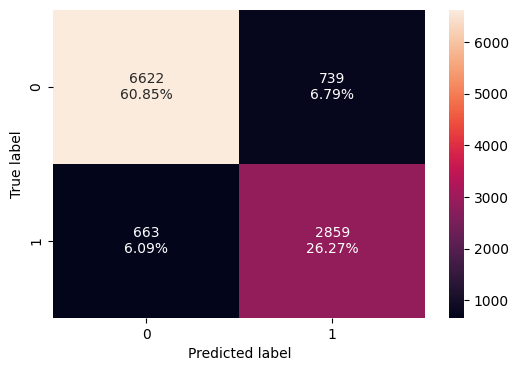

In [131]:
confusion_matrix_sklearn(model0, X_test, y_test)

In [132]:
decision_tree_perf_test_without = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_perf_test_without

Accuracy    Recall  Precision       F1
0  0.871175  0.811755   0.794608  0.80309

Observations:

- Decision Tree default gets higher Recall, Precision, F1 — BUT is clearly overfitting (99.4% train accuracy).

Decision Tree (with class_weights)

In [133]:
model = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

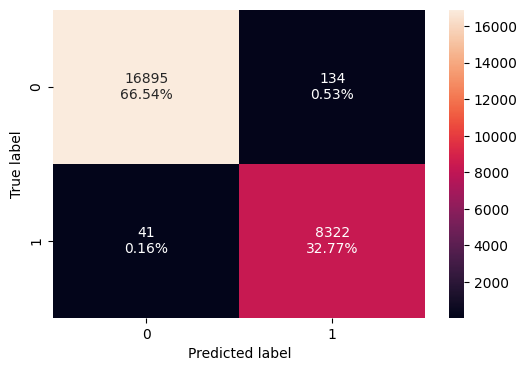

In [134]:
confusion_matrix_sklearn(model, X_train, y_train)

In [135]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

Accuracy    Recall  Precision        F1
0  0.993108  0.995097   0.984153  0.989595

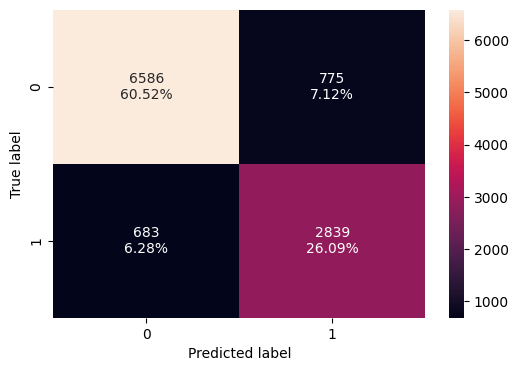

In [136]:
confusion_matrix_sklearn(model, X_test, y_test)

In [137]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

Accuracy    Recall  Precision        F1
0   0.86603  0.806076   0.785556  0.795684

Observations:

-  Decision Tree with class_weight='balanced' improves Recall and F1 vs Logistic Regression.

- Accuracy jumps to 86.6% — but this is expected, DT is more flexible.

- Still overfitting — gap between train (99%) and test (86%).

## Decision Tree (Pre-pruning)

In [138]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
#parameters = {
 #   "class_weight": [None, "balanced"],
  #  "max_depth": [3, 5, 7, 10, None],
  #  "min_samples_split": [2, 5, 10, 20],
  #  "min_samples_leaf": [1, 2, 5, 10],
  #  "max_features": ["sqrt", "log2", None]
#}

#parameters = {
#    "class_weight": [None, "balanced"],
#    "max_depth": [7],
#    "min_samples_split": [5],
#    "min_samples_leaf": [2],
#    "max_features": ['sqrt']
#}

parameters = {
    "max_depth": [5,6],
    "criterion": ["entropy", "gini"],
    "splitter": ["best"],
    "min_impurity_decrease": [0.000001, 0.00001, 0.0001],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_impurity_decrease=1e-06, random_state=1)

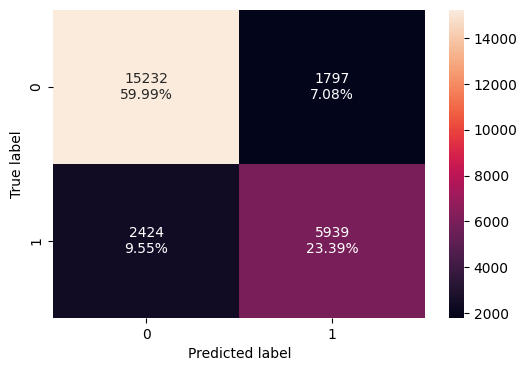

In [139]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [140]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

Accuracy    Recall  Precision       F1
0  0.833767  0.710152   0.767709  0.73781

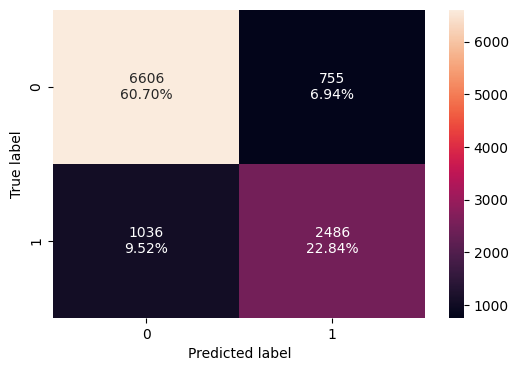

In [141]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [142]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

Accuracy    Recall  Precision        F1
0  0.835431  0.705849   0.767047  0.735177

In [143]:
feature_names = list(X_train.columns)
importances = estimator.feature_importances_
indices = np.argsort(importances)

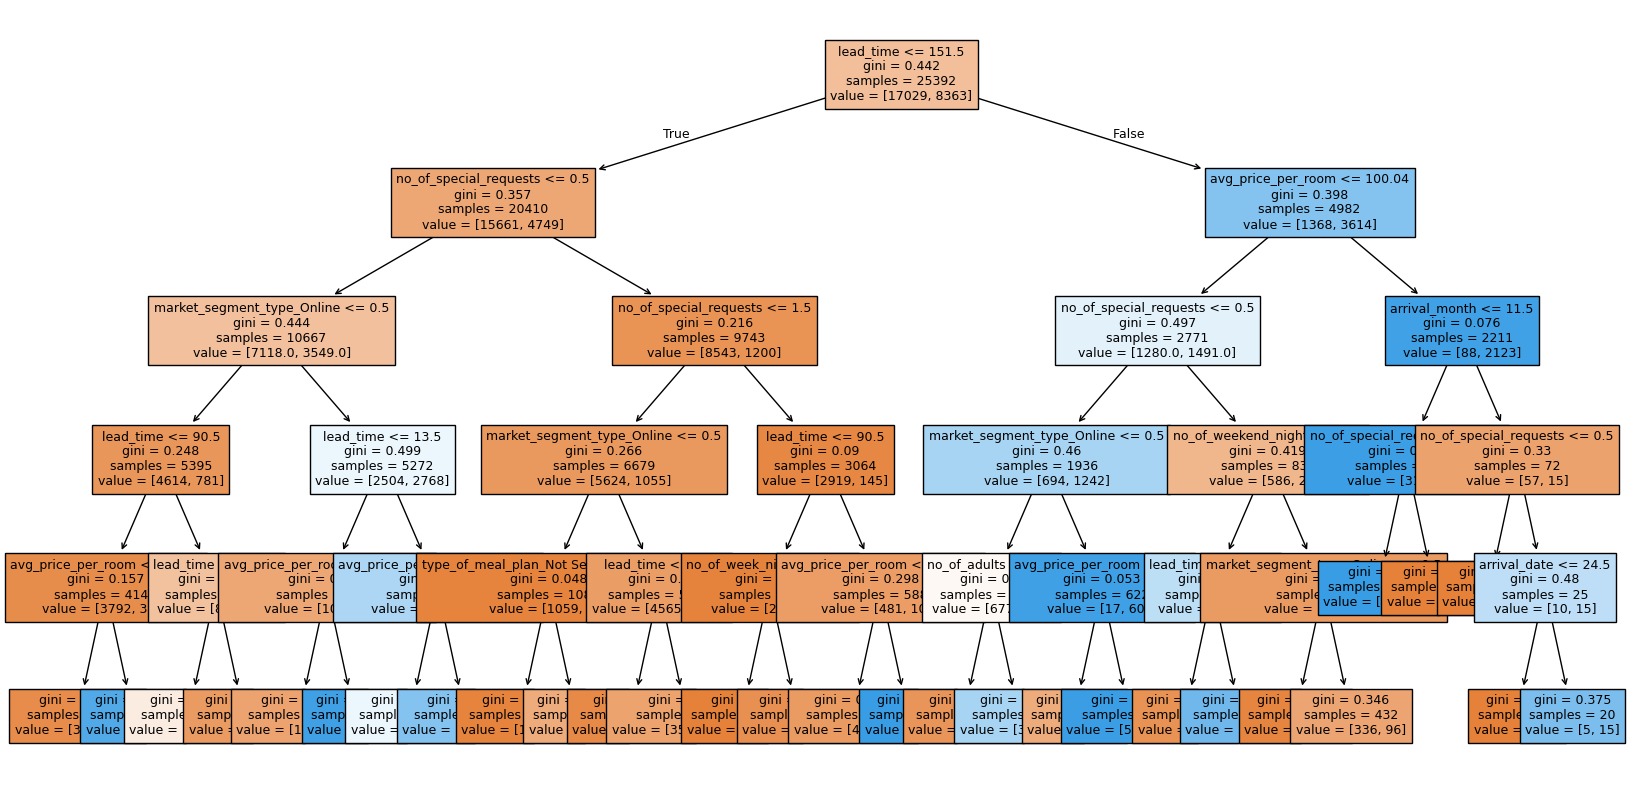

In [144]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [145]:
importances = estimator.feature_importances_
importances

array([0.02711302, 0.        , 0.01222723, 0.00136314, 0.        ,
       0.49211247, 0.        , 0.01618894, 0.00086579, 0.        ,
       0.        , 0.        , 0.1156935 , 0.13640247, 0.        ,
       0.        , 0.00056057, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.19747287])

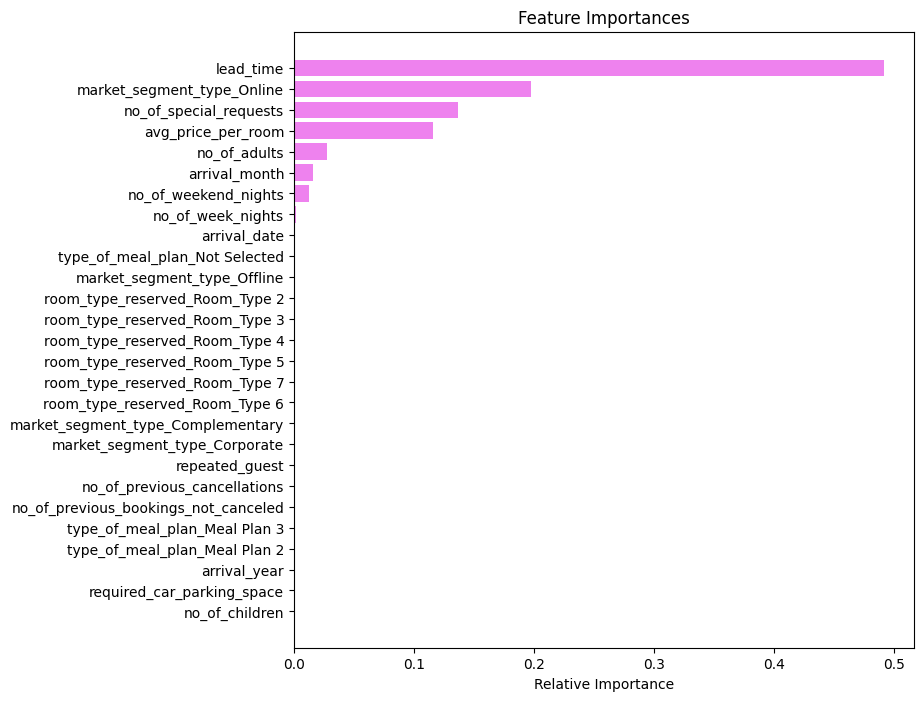

In [146]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Observations:

- Decision Tree (tuned) — stable, good F1, good Precision, decent Recall (~73%).

##Decision Tree (Post pruning)

### Do we need to prune the tree?

In [147]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [148]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000e+00    0.008376
1     0.000000e+00    0.008376
2     2.933821e-20    0.008376
3     2.933821e-20    0.008376
4     2.933821e-20    0.008376
...            ...         ...
1853  8.901596e-03    0.328058
1854  9.802243e-03    0.337860
1855  1.271875e-02    0.350579
1856  3.412090e-02    0.418821
1857  8.117914e-02    0.500000

[1858 rows x 2 columns]

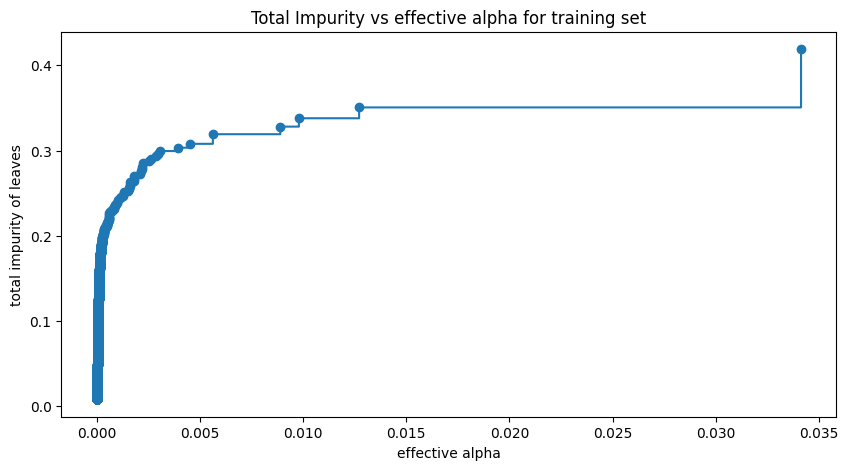

In [149]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [150]:
#clfs = []
#for ccp_alpha in ccp_alphas:
#    clf = DecisionTreeClassifier(
#        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
#    )
#    clf.fit(X_train, y_train)
#    clfs.append(clf)
#print(
#    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
#        clfs[-1].tree_.node_count, ccp_alphas[-1]
#    )
#)

In [151]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced",max_depth=6
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389136915


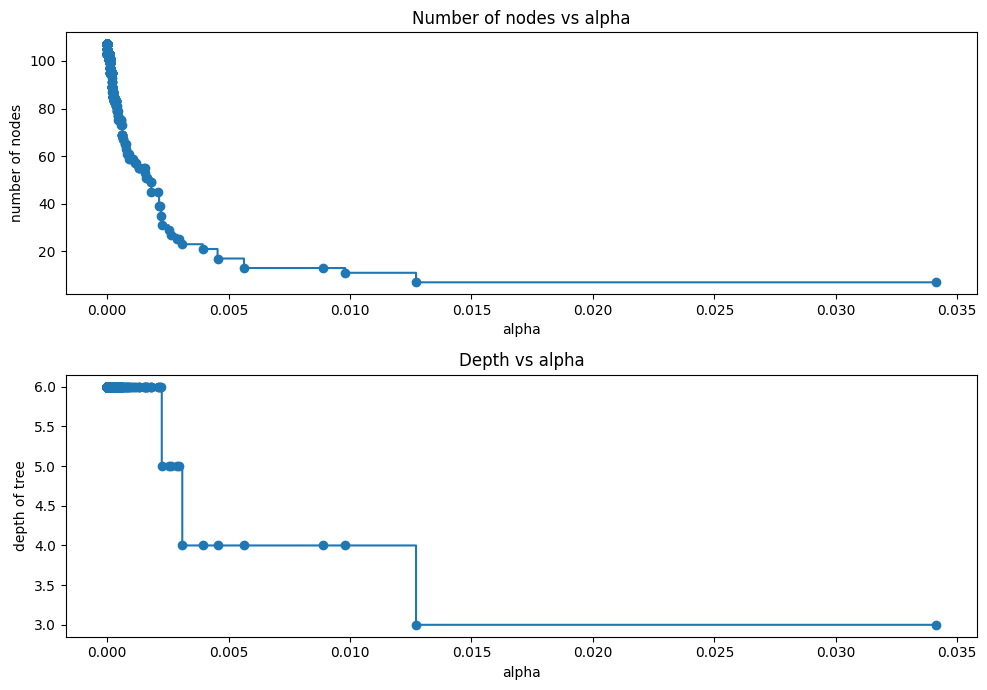

In [152]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### Recall vs alpha for training and testing sets

In [153]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [154]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [155]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

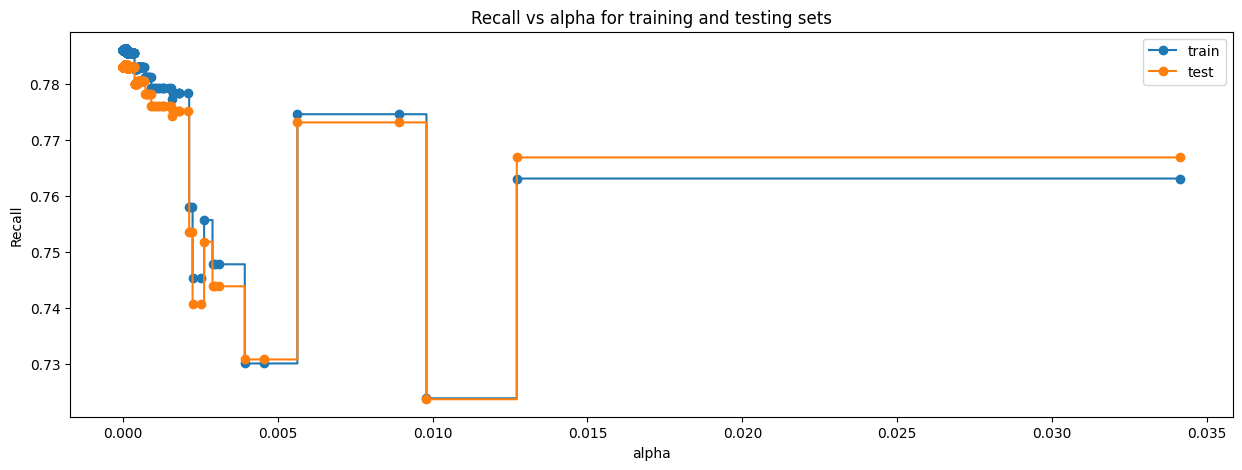

In [156]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [157]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=np.float64(7.133730326417545e-05),
                       class_weight='balanced', max_depth=6, random_state=1)


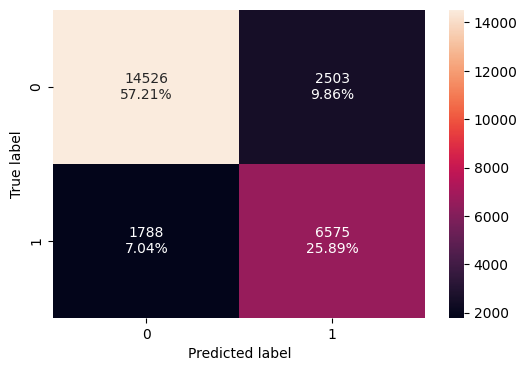

In [158]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [159]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

Accuracy    Recall  Precision        F1
0   0.83101  0.786201   0.724278  0.753971

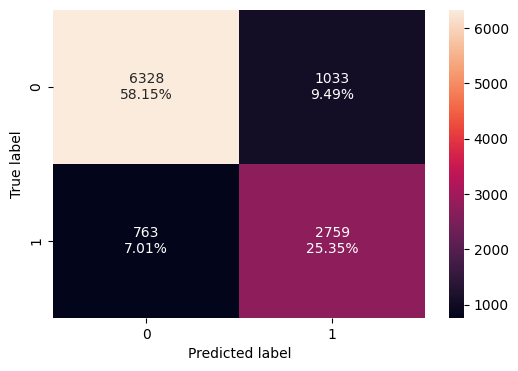

In [160]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [161]:
decision_tree_post_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_test

Accuracy    Recall  Precision        F1
0  0.834972  0.783362   0.727584  0.754444

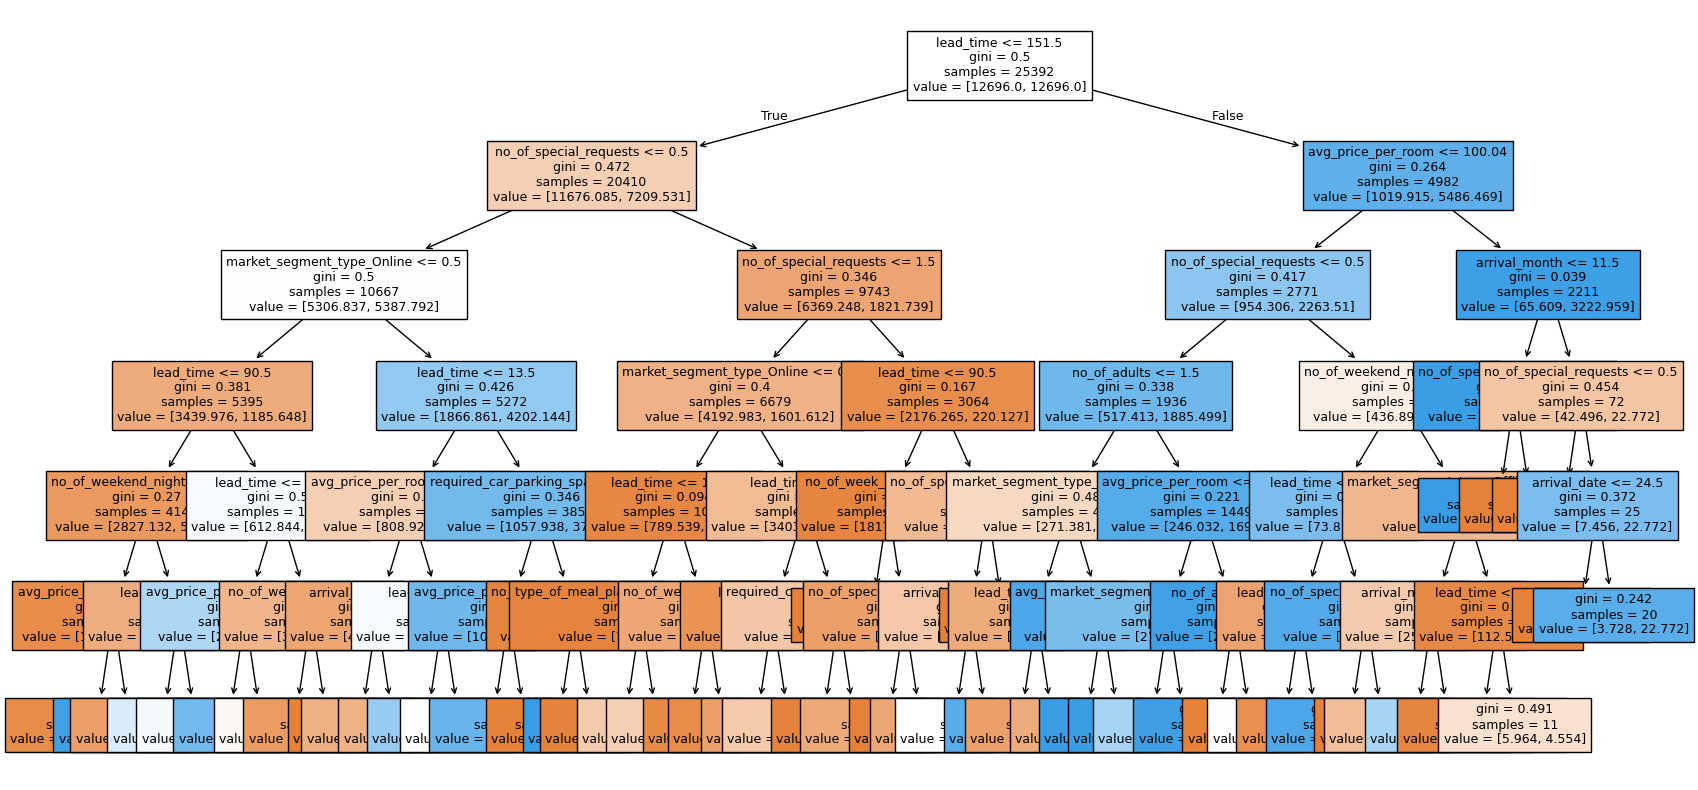

In [162]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [163]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 133.59] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 24.29] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

In [164]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

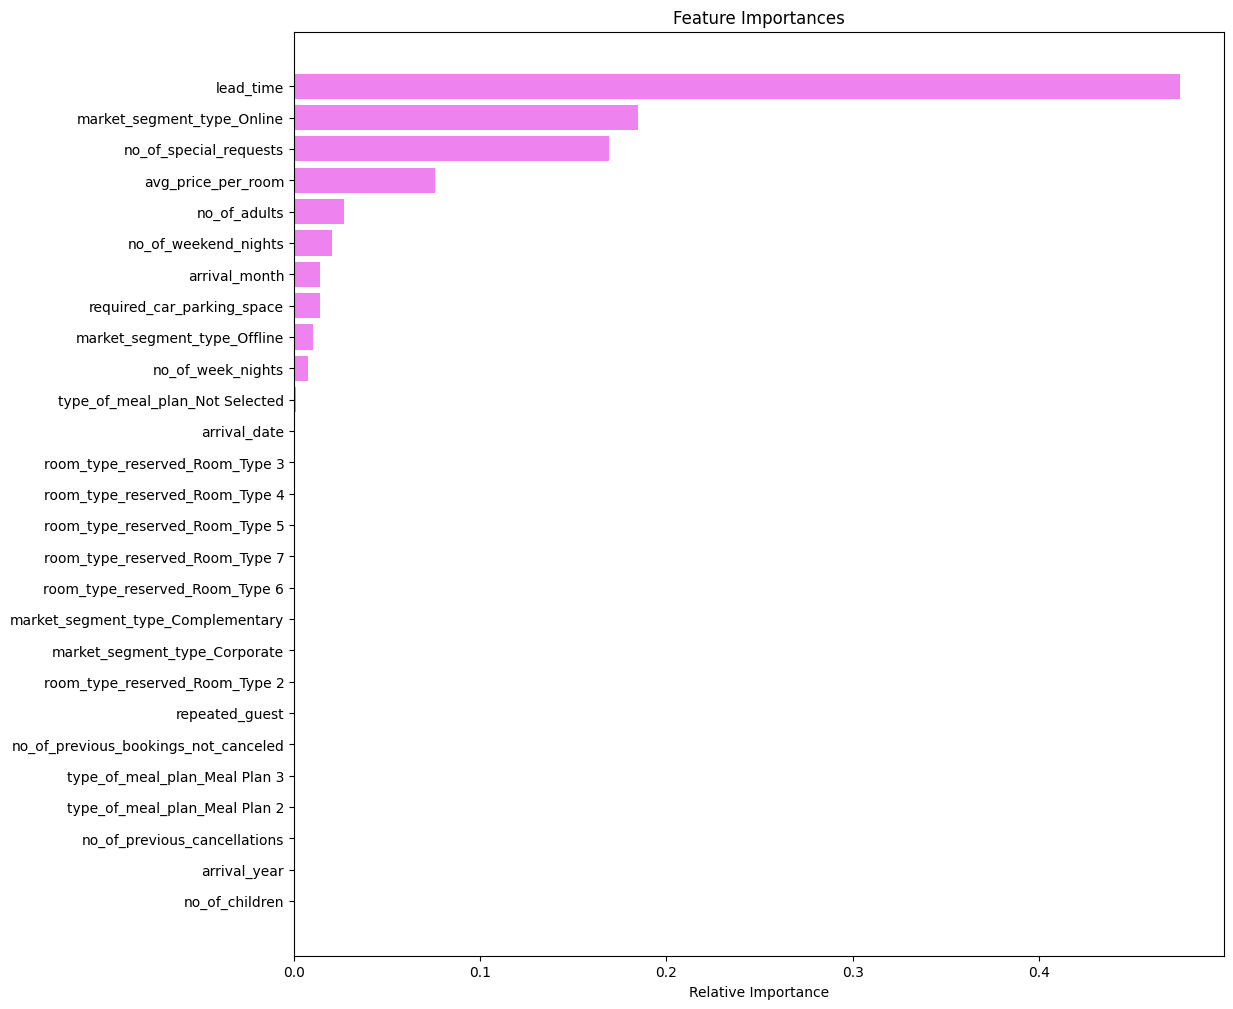

In [165]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Do we need to prune? Yes, we need, it is necessary to prevent overfitting, improve generalization to unseen data, and enhance interpretability.

Observations:

- Excellent balance between train and test → no overfitting now.

- Recall 78.34% — very high → matches the business goal (catch cancellations).

-  F1 75.44% — best so far across all models.

- Accuracy 83.5% — also strong.

## Model Performance Comparison and Conclusions

Comparison of Models and Final Model Selection

In [166]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train_without.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree without class_weight  \
Accuracy                             0.994211   
Recall                               0.986608   
Precision                            0.995776   
F1                                   0.991171   

           Decision Tree with class_weight  Decision Tree (Pre-Pruning)  \
Accuracy                          0.993108                     0.833767   
Recall                            0.995097                     0.710152   
Precision                         0.984153                     0.767709   
F1                                0.989595                     0.737810   

           Decision Tree (Post-Pruning)  
Accuracy                       0.831010  
Recall                         0.786201  
Precision                      0.724278  
F1                             0.753971

In [167]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test_without.T,
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Decision Tree without class_weight  \
Accuracy                             0.871175   
Recall                               0.811755   
Precision                            0.794608   
F1                                   0.803090   

           Decision Tree with class_weight  Decision Tree (Pre-Pruning)  \
Accuracy                          0.866030                     0.835431   
Recall                            0.806076                     0.705849   
Precision                         0.785556                     0.767047   
F1                                0.795684                     0.735177   

           Decision Tree (Post-Pruning)  
Accuracy                       0.834972  
Recall                         0.783362  
Precision                      0.727584  
F1                             0.754444

Observations:

- The Decision Tree post pruning helped simplify the tree while keeping  performance high.

-  Excellent Recall.

- Very good Precision (~73%).

- Highest F1.

-  No overfitting.



###Conclusion: Decision Tree Model.

Conclusion:

The decision tree model was developed to predict the likelihood of hotel booking cancellations based on customer behavior and booking features.

Best Overall Trade-off: Pre-Pruned Tree
Pre-Pruned Decision Tree achieved a strong balance of performance and simplicity:

Training Set:

Accuracy: 83.4%

Recall: 78.6%

Precision: 72.3%

F1 Score: 75.39%

Test Set:

Accuracy: 83.5%

Recall: 78.33%

Precision: 72.75%

F1 Score: 75.54%

It generalizes well to unseen data, maintains a controlled tree depth, and avoids overfitting seen in the fully-grown model.

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

What profitable policies for cancellations and refunds can the hotel adopt?

 1. Cancellation poliy based on lead time, guest with long lead times (> 90  days) are more likely to cancel.

       Recommendation:

       - OfFer non-refundable discount for early bookings.

       - Allow free cancellation up to a certain treshold like 30 days and partial refund if canceled later.

 2.  Non-refundable Promotions for Low-Price Bookings

      Recommendations:

      - Offer cheaper non refundable rates to these guests.

3.   For pre-booking offer meal plans (breakfast included), guests without a  meal plan selected tend to cancel more.     

4.  Offer loyalty points for non-refundable bookings, repeated guests are much less likely to cancel.

What other recommedations would you suggest to the hotel?


1. Dynamic Pricing Based on Segment Behavior:
   Adjust pricing and refund rules by segment.

2. Targeted offers for high risk profiles:
   Predict risky bookings and offer pre-paid options.

3. For high-risk profiles (long lead time + new guests + no requests), send friendly reminders before free cancelation window closes.
   
      

## Models comparasion and Recommendation Based on Objective


- **Model Comparasion on Test**

| Metric        | Logistic Regression | Decision Tree (Pre-Pruning) |
| ------------- | ------------------- | --------------------------- |
| **Accuracy**  | 79.55%               | 83.5%                       |
| **Recall**    | 73.96%               | **78.6%**                    |
| **Precision** | 66.57%               | 72.75%                       |
| **F1 Score**  | 70.07%               | **75.54%**                   |


Best choice according to our objective (Predict which bookings will be canceled in advance), is the **decision tree**, this model performs better on every key metric, including the most important **RECALL**

It prioritizes recall, reducing the risk of missing actual cancellations.


In [168]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [169]:

!ls "/content/drive/MyDrive/KB_Project_SLC_DSBA_INNHotels_FullCode"

ls: cannot access '/content/drive/MyDrive/KB_Project_SLC_DSBA_INNHotels_FullCode': No such file or directory


In [170]:

!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/KB_Project_SLC_DSBA_INNHotels_FullCode.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/KB_Project_SLC_DSBA_INNHotels_FullCode.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 55 image(s).
[NbConvertApp] Writing 3991003 bytes to /content/drive/MyDrive/Colab Notebooks/KB_Project_SLC_DSBA_INNHotels_FullCode.html


In [171]:
from google.colab import files
files.download("/content/drive/MyDrive/Colab Notebooks/KB_Project_SLC_DSBA_INNHotels_FullCode.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>